In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Input, Concatenate, LSTM
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, precision_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [3]:
# import dataset
df = pd.read_excel('DataSet_v1.xlsx', skiprows=3).drop('Unnamed: 0', axis=1)
print(df.shape)
df.head()

(667, 16)


,ID,Year of Income,Career,Gender,Qualified Practice 1,Partial Task,Midterm Exam,Qualified Practice 2,Final Task,Participation in Class,Final Exam,Linguistic Comprehension,Mathematic,Final average,Target,Output Feature 2
0,1,2022,ISI,M,9,19.0,17.0,12.0,13.0,19,12.0,19,17,13.40,Approved,Complete
1,2,2022,ISI,F,15,20.0,20.0,20.0,20.0,18,14.0,20,19,17.90,Approved,Complete
2,3,2022,ISI,M,6,0.0,0.0,5.0,6.0,14,6.0,11,10,5.05,Disapproved,Complete
3,4,2022,ISI,M,20,20.0,20.0,20.0,20.0,20,18.0,20,19,19.50,Approved,Complete
4,5,2022,ISI,M,6,16.0,15.0,7.0,17.0,18,7.0,16,12,11.60,Disapproved,Complete


##### Initial Analysis

In [4]:
# check for missing values
df.isnull().sum()

ID                          0
Year of Income              0
Career                      0
Gender                      0
Qualified Practice 1        0
Partial Task                2
Midterm Exam                2
Qualified Practice 2        0
Final Task                  2
Participation in Class      0
Final Exam                  0
Linguistic Comprehension    0
Mathematic                  0
Final average               0
Target                      0
Output Feature 2            0
dtype: int64

In [5]:
# check missing percentage
df.isnull().sum()/df.shape[0]*100

ID                          0.00000
Year of Income              0.00000
Career                      0.00000
Gender                      0.00000
Qualified Practice 1        0.00000
Partial Task                0.29985
Midterm Exam                0.29985
Qualified Practice 2        0.00000
Final Task                  0.29985
Participation in Class      0.00000
Final Exam                  0.00000
Linguistic Comprehension    0.00000
Mathematic                  0.00000
Final average               0.00000
Target                      0.00000
Output Feature 2            0.00000
dtype: float64

Since its less than 1 percent, we can drop the rows with missing values.

In [6]:
# drop missing values
df.dropna(inplace=True)

In [7]:
# check duplicates
df.duplicated().sum()

0

In [8]:
# check data types
df.dtypes

ID                            int64
Year of Income                int64
Career                       object
Gender                       object
Qualified Practice 1          int64
Partial Task                float64
Midterm Exam                float64
Qualified Practice 2        float64
Final Task                  float64
Participation in Class        int64
Final Exam                  float64
Linguistic Comprehension      int64
Mathematic                    int64
Final average               float64
Target                       object
Output Feature 2             object
dtype: object

In [9]:
# convert year to categorical
df['Year of Income'] = df['Year of Income'].astype('object')

In [10]:
# check number of unique values
df.nunique()

ID                          661
Year of Income                3
Career                        3
Gender                        2
Qualified Practice 1         21
Partial Task                  9
Midterm Exam                 21
Qualified Practice 2         24
Final Task                   15
Participation in Class       13
Final Exam                   23
Linguistic Comprehension     20
Mathematic                   19
Final average               177
Target                        2
Output Feature 2              2
dtype: int64

We see ID is a unique identifier for each row. We can drop it as it does not add any value to our analysis. We will also drop Output Feature 2 as we are not going to use it in our analysis.

In [11]:
# drop redundant columns
df.drop(['ID','Final Task','Participation in Class','Final Exam','Linguistic Comprehension','Mathematic', 'Output Feature 2','Final average'], axis=1, inplace=True)

In [12]:
df.head()

,Year of Income,Career,Gender,Qualified Practice 1,Partial Task,Midterm Exam,Qualified Practice 2,Target
0,2022,ISI,M,9,19.0,17.0,12.0,Approved
1,2022,ISI,F,15,20.0,20.0,20.0,Approved
2,2022,ISI,M,6,0.0,0.0,5.0,Disapproved
3,2022,ISI,M,20,20.0,20.0,20.0,Approved
4,2022,ISI,M,6,16.0,15.0,7.0,Disapproved


##### Univariate Analysis of Numerical Features

Feature Name: Qualified Practice 1
Mean: 12.198184568835098
Median: 13.0
Standard Deviation: 6.192497638453004
Minimum: 0
Maximum: 20
Skewness: -0.28684268074828206
Kurtosis: -1.067693743032935


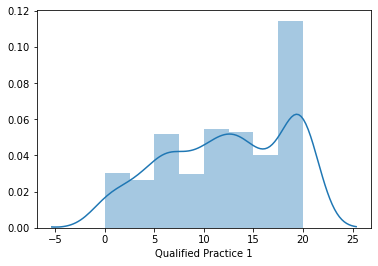

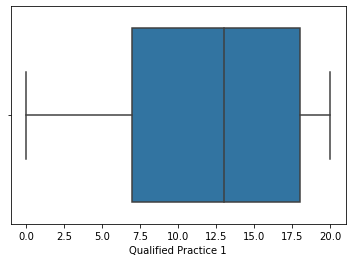

----------------------------------------
Feature Name: Partial Task
Mean: 17.89409984871407
Median: 18.0
Standard Deviation: 2.1357657733234685
Minimum: 0.0
Maximum: 20.0
Skewness: -3.7954802882639673
Kurtosis: 28.171000611134698


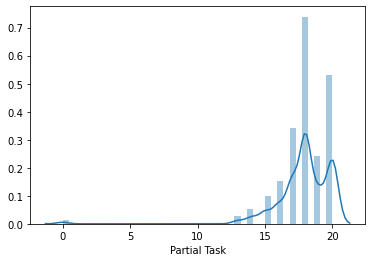

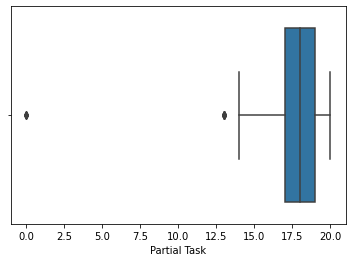

----------------------------------------
Feature Name: Midterm Exam
Mean: 12.399394856278366
Median: 13.0
Standard Deviation: 5.909745387268121
Minimum: 0.0
Maximum: 20.0
Skewness: -0.49317840413966296
Kurtosis: -0.7294444667049187


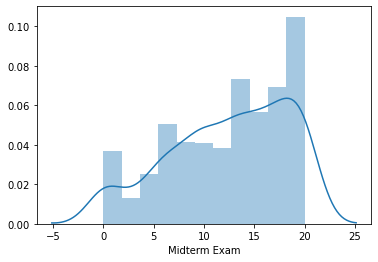

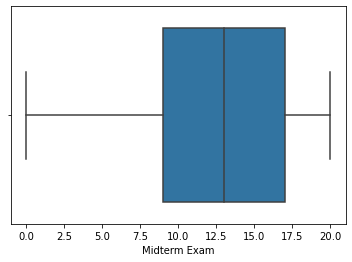

----------------------------------------
Feature Name: Qualified Practice 2
Mean: 11.786686838124055
Median: 12.0
Standard Deviation: 6.493169236482225
Minimum: 0.0
Maximum: 20.0
Skewness: -0.3115974873552572
Kurtosis: -1.0848881474221101


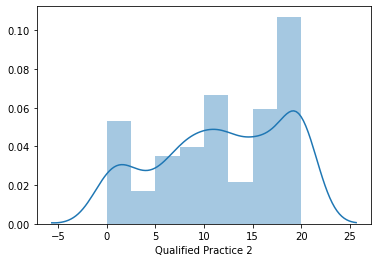

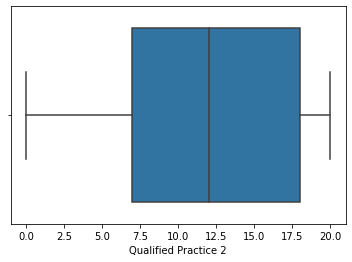

----------------------------------------


In [13]:
# Univariate analysis for numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    print('Feature Name:', col)
    print('Mean:', df[col].mean())
    print('Median:', df[col].median())
    print('Standard Deviation:', df[col].std())
    print('Minimum:', df[col].min())
    print('Maximum:', df[col].max())
    print('Skewness:', df[col].skew())
    print('Kurtosis:', df[col].kurtosis())
    sns.distplot(df[col], kde=True)
    plt.show()
    sns.boxplot(df[col])
    plt.show()
    print('----------------------------------------')

In [14]:
#Observations
#- Qualififed Practice 1 and 2 seems normally distributed with no presence of outliers.
#- Partial Task seems negatively skewed with presence of outliers. This indicate more students tend to achieve higher scores.
#- Midterm Exam seems normally distributed with no presence of outliers.
#- Final Task seems negatively skewed but no presence of outliers can be observed.
#- Participation in Class seems negatively skewed with presence of outliers. A high number of students can be observed with next to zero participation.
#- Final Exam seems normally distributed with no presence of outliers.
#- Linguistic Comprehension and Mathematics seems negatively skewed with presence of outliers.
#- Output is normally distributed with no outliers.

# Univariate Analysis of Categorical Features

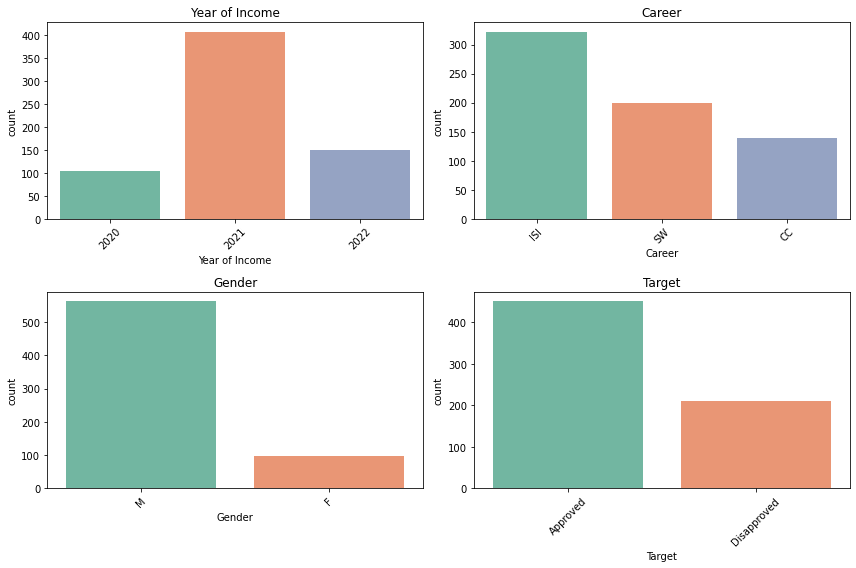

In [15]:
cat_cols = df.select_dtypes(include=['object']).columns

plot_count = 1
plt.figure(figsize = (12,8))
for col in cat_cols:
    plt.subplot(2, 2, plot_count)
    plt.gca().set_title(col)
    sns.countplot(x=col, data=df, palette='Set2')
    plt.xticks(rotation=45)
    plot_count += 1
plt.tight_layout()
plt.show()

Observations:
- Imbalanced distribution for Year of Income and Sex.
- Target Variable, i.e., Target is balanced.

##### Multivariate Analysis of Categorical Features

##### Multivariate Analysis of Numerical Features

In [16]:
# label encode target variable using map
df['Target'] = df['Target'].map({'Disapproved': 0, 'Approved': 1})

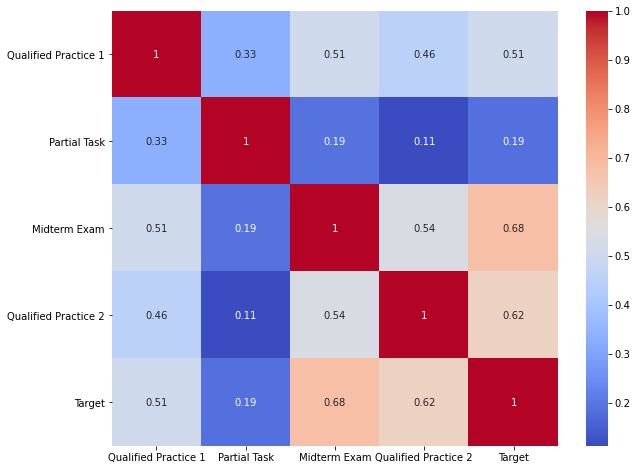

In [17]:
# correlation heatmap for numerical columns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

##### Data Augmentation (GAN)

In [18]:
# label encode categorical columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [19]:
df

,Year of Income,Career,Gender,Qualified Practice 1,Partial Task,Midterm Exam,Qualified Practice 2,Target
0,2,1,1,9,19.0,17.0,12.0,1
1,2,1,0,15,20.0,20.0,20.0,1
2,2,1,1,6,0.0,0.0,5.0,0
3,2,1,1,20,20.0,20.0,20.0,1
4,2,1,1,6,16.0,15.0,7.0,0
...,...,...,...,...,...,...,...,...
662,1,2,1,19,18.0,14.0,17.0,1
663,1,2,1,11,18.0,9.0,15.0,1
664,1,2,1,18,18.0,20.0,12.0,1
665,1,2,1,18,19.0,12.0,17.0,1


In [20]:
# seperate 20% of data for testing
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
X_train

,Year of Income,Career,Gender,Qualified Practice 1,Partial Task,Midterm Exam,Qualified Practice 2
532,2,1,1,15,19.0,17.0,10.0
333,1,2,1,16,18.0,9.0,4.0
556,2,1,0,14,20.0,10.0,18.0
662,1,2,1,19,18.0,14.0,17.0
457,1,2,1,10,15.0,16.0,16.0
...,...,...,...,...,...,...,...
352,1,0,1,3,19.0,0.0,12.0
372,0,1,1,12,18.0,7.0,9.0
423,0,1,0,18,18.0,13.0,18.5
650,1,0,1,14,18.0,19.0,16.0


In [22]:
# scale data
#scaler = MinMaxScaler(feature_range=(-1, 1))
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [23]:
def create_generator(input_dim, num_classes):
    input_noise = Input(shape=(input_dim,))
    input_label = Input(shape=(1,))
    x = Concatenate()([input_noise, input_label])

    model = Sequential()
    model.add(Dense(128, input_dim=input_dim + num_classes))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(np.prod(X_train.shape[1:]), activation='tanh'))

    x = model(x)
    return Model([input_noise, input_label], x)

In [24]:
def create_discriminator():
    input_data = Input(shape=X_train.shape[1:])
    input_label = Input(shape=(1,))
    x = Concatenate()([input_data, input_label])

    model = Sequential()
    model.add(Dense(256, input_dim=X_train.shape[1] + 1))
    model.add(LeakyReLU(0.2))
    model.add(Dense(128))
    model.add(LeakyReLU(0.2))
    model.add(Dense(1, activation='sigmoid'))

    x = model(x)
    return Model([input_data, input_label], x)

In [25]:
def train_gan(epochs, batch_size):
    half_batch = int(batch_size / 2)

    for epoch in range(epochs):
        # Train discriminator
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        real_samples = X_train.iloc[idx]
        real_labels = y.values[idx]

        noise = np.random.normal(0, 1, (half_batch, 100))
        synthetic_labels = 1 - real_labels
        synthetic_samples = generator.predict([noise, synthetic_labels])

        d_loss_real = discriminator.train_on_batch([real_samples, real_labels], np.ones(half_batch))
        d_loss_synthetic = discriminator.train_on_batch([synthetic_samples, synthetic_labels], np.zeros(half_batch))

        d_loss = 0.5 * np.add(d_loss_real, d_loss_synthetic)

        # Train generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        sampled_labels = np.random.randint(0, 2, batch_size)
        g_loss = combined.train_on_batch([noise, sampled_labels], np.ones(batch_size))

        print(f"Epoch {epoch}: [D loss: {d_loss}, acc: {0.5 * (d_loss_real[1] + d_loss_synthetic[1])}] [G loss: {g_loss}]")

In [26]:
generator = create_generator(100, 1)
discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.001, 0.8), metrics=['accuracy'])

In [27]:
# Freeze the discriminator for generator training
discriminator.trainable = False
gan_input_noise = Input(shape=(100,))
gan_input_label = Input(shape=(1,))
x = generator([gan_input_noise, gan_input_label])
gan_output = discriminator([x, gan_input_label])
combined = Model([gan_input_noise, gan_input_label], gan_output)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.001, 0.8))

In [28]:
X_train

,Year of Income,Career,Gender,Qualified Practice 1,Partial Task,Midterm Exam,Qualified Practice 2
532,2,1,1,15,19.0,17.0,10.0
333,1,2,1,16,18.0,9.0,4.0
556,2,1,0,14,20.0,10.0,18.0
662,1,2,1,19,18.0,14.0,17.0
457,1,2,1,10,15.0,16.0,16.0
...,...,...,...,...,...,...,...
352,1,0,1,3,19.0,0.0,12.0
372,0,1,1,12,18.0,7.0,9.0
423,0,1,0,18,18.0,13.0,18.5
650,1,0,1,14,18.0,19.0,16.0


In [29]:
train_gan(epochs=10000, batch_size=32)

Epoch 0: [D loss: [0.77885568 0.4375    ], acc: 0.4375] [G loss: 0.7213656902313232]
Epoch 1: [D loss: [0.34107474 0.84375   ], acc: 0.84375] [G loss: 0.710578203201294]
Epoch 2: [D loss: [0.32310437 0.84375   ], acc: 0.84375] [G loss: 0.7380459904670715]
Epoch 3: [D loss: [0.32913323 0.84375   ], acc: 0.84375] [G loss: 0.747124195098877]
Epoch 4: [D loss: [0.30168634 0.9375    ], acc: 0.9375] [G loss: 0.7721095085144043]
Epoch 5: [D loss: [0.35198257 0.71875   ], acc: 0.71875] [G loss: 0.8116332292556763]
Epoch 6: [D loss: [0.28979161 0.90625   ], acc: 0.90625] [G loss: 0.8631424307823181]
Epoch 7: [D loss: [0.25140217 0.96875   ], acc: 0.96875] [G loss: 0.9301546812057495]
Epoch 8: [D loss: [0.26558122 0.96875   ], acc: 0.96875] [G loss: 0.9559342861175537]
Epoch 9: [D loss: [0.25725742 0.875     ], acc: 0.875] [G loss: 1.0101487636566162]
Epoch 10: [D loss: [0.21634473 0.96875   ], acc: 0.96875] [G loss: 1.1009600162506104]
Epoch 11: [D loss: [0.22909319 1.        ], acc: 1.0] [G lo

Epoch 99: [D loss: [0.01794408 1.        ], acc: 1.0] [G loss: 3.954271078109741]
Epoch 100: [D loss: [0.01570471 1.        ], acc: 1.0] [G loss: 3.9203672409057617]
Epoch 101: [D loss: [0.02164504 1.        ], acc: 1.0] [G loss: 3.9718449115753174]
Epoch 102: [D loss: [0.02142885 1.        ], acc: 1.0] [G loss: 3.831757068634033]
Epoch 103: [D loss: [0.02296911 1.        ], acc: 1.0] [G loss: 4.349344253540039]
Epoch 104: [D loss: [0.0173071 1.       ], acc: 1.0] [G loss: 4.015045166015625]
Epoch 105: [D loss: [0.04258261 0.96875   ], acc: 0.96875] [G loss: 4.211719036102295]
Epoch 106: [D loss: [0.01188825 1.        ], acc: 1.0] [G loss: 4.063329696655273]
Epoch 107: [D loss: [0.01745286 1.        ], acc: 1.0] [G loss: 4.014693260192871]
Epoch 108: [D loss: [0.32975558 0.96875   ], acc: 0.96875] [G loss: 4.232938766479492]
Epoch 109: [D loss: [0.020116 1.      ], acc: 1.0] [G loss: 3.9199061393737793]
Epoch 110: [D loss: [0.02457551 1.        ], acc: 1.0] [G loss: 3.943227529525757]


Epoch 198: [D loss: [0.00852371 1.        ], acc: 1.0] [G loss: 4.653261184692383]
Epoch 199: [D loss: [0.00912062 1.        ], acc: 1.0] [G loss: 4.719244956970215]
Epoch 200: [D loss: [0.00627458 1.        ], acc: 1.0] [G loss: 4.799464225769043]
Epoch 201: [D loss: [0.00709549 1.        ], acc: 1.0] [G loss: 5.036075592041016]
Epoch 202: [D loss: [0.00362593 1.        ], acc: 1.0] [G loss: 5.234739303588867]
Epoch 203: [D loss: [0.00311952 1.        ], acc: 1.0] [G loss: 5.102202892303467]
Epoch 204: [D loss: [0.00877629 1.        ], acc: 1.0] [G loss: 5.104752063751221]
Epoch 205: [D loss: [0.00314776 1.        ], acc: 1.0] [G loss: 5.22779655456543]
Epoch 206: [D loss: [0.00375619 1.        ], acc: 1.0] [G loss: 5.457695960998535]
Epoch 207: [D loss: [0.00432379 1.        ], acc: 1.0] [G loss: 5.716306209564209]
Epoch 208: [D loss: [0.00188677 1.        ], acc: 1.0] [G loss: 5.303197860717773]
Epoch 209: [D loss: [0.00974943 1.        ], acc: 1.0] [G loss: 5.482706069946289]
Epoch

Epoch 296: [D loss: [7.60004076e-04 1.00000000e+00], acc: 1.0] [G loss: 6.681944847106934]
Epoch 297: [D loss: [7.55507526e-04 1.00000000e+00], acc: 1.0] [G loss: 6.811794281005859]
Epoch 298: [D loss: [7.07488411e-04 1.00000000e+00], acc: 1.0] [G loss: 6.733644008636475]
Epoch 299: [D loss: [7.0002745e-04 1.0000000e+00], acc: 1.0] [G loss: 6.769400119781494]
Epoch 300: [D loss: [6.3098334e-04 1.0000000e+00], acc: 1.0] [G loss: 6.743984699249268]
Epoch 301: [D loss: [6.10166586e-04 1.00000000e+00], acc: 1.0] [G loss: 6.89491605758667]
Epoch 302: [D loss: [5.43071877e-04 1.00000000e+00], acc: 1.0] [G loss: 6.914093971252441]
Epoch 303: [D loss: [5.63035197e-04 1.00000000e+00], acc: 1.0] [G loss: 6.888686180114746]
Epoch 304: [D loss: [6.5013416e-04 1.0000000e+00], acc: 1.0] [G loss: 6.957444667816162]
Epoch 305: [D loss: [0.00147894 1.        ], acc: 1.0] [G loss: 6.919912338256836]
Epoch 306: [D loss: [5.863517e-04 1.000000e+00], acc: 1.0] [G loss: 6.895125389099121]
Epoch 307: [D loss

Epoch 388: [D loss: [0.00100915 1.        ], acc: 1.0] [G loss: 6.993573188781738]
Epoch 389: [D loss: [5.65204103e-04 1.00000000e+00], acc: 1.0] [G loss: 7.037177085876465]
Epoch 390: [D loss: [5.22821469e-04 1.00000000e+00], acc: 1.0] [G loss: 7.036657333374023]
Epoch 391: [D loss: [4.349757e-04 1.000000e+00], acc: 1.0] [G loss: 7.043221950531006]
Epoch 392: [D loss: [5.09760102e-04 1.00000000e+00], acc: 1.0] [G loss: 7.10930061340332]
Epoch 393: [D loss: [4.93681362e-04 1.00000000e+00], acc: 1.0] [G loss: 7.134398460388184]
Epoch 394: [D loss: [4.47616103e-04 1.00000000e+00], acc: 1.0] [G loss: 7.146068572998047]
Epoch 395: [D loss: [4.71460209e-04 1.00000000e+00], acc: 1.0] [G loss: 7.196164131164551]
Epoch 396: [D loss: [5.80954002e-04 1.00000000e+00], acc: 1.0] [G loss: 7.147506237030029]
Epoch 397: [D loss: [3.70074748e-04 1.00000000e+00], acc: 1.0] [G loss: 7.206254005432129]
Epoch 398: [D loss: [3.6690858e-04 1.0000000e+00], acc: 1.0] [G loss: 7.1956787109375]
Epoch 399: [D lo

Epoch 479: [D loss: [2.32718095e-04 1.00000000e+00], acc: 1.0] [G loss: 7.823091506958008]
Epoch 480: [D loss: [2.37628608e-04 1.00000000e+00], acc: 1.0] [G loss: 7.895886421203613]
Epoch 481: [D loss: [2.14564058e-04 1.00000000e+00], acc: 1.0] [G loss: 7.784792423248291]
Epoch 482: [D loss: [2.06821431e-04 1.00000000e+00], acc: 1.0] [G loss: 7.974696159362793]
Epoch 483: [D loss: [2.15723439e-04 1.00000000e+00], acc: 1.0] [G loss: 7.715241432189941]
Epoch 484: [D loss: [2.40782261e-04 1.00000000e+00], acc: 1.0] [G loss: 7.9185791015625]
Epoch 485: [D loss: [4.34904039e-04 1.00000000e+00], acc: 1.0] [G loss: 7.989789962768555]
Epoch 486: [D loss: [2.31156202e-04 1.00000000e+00], acc: 1.0] [G loss: 7.876108169555664]
Epoch 487: [D loss: [2.01363742e-04 1.00000000e+00], acc: 1.0] [G loss: 7.911157608032227]
Epoch 488: [D loss: [2.22742054e-04 1.00000000e+00], acc: 1.0] [G loss: 7.914853572845459]
Epoch 489: [D loss: [1.85576384e-04 1.00000000e+00], acc: 1.0] [G loss: 7.945552825927734]
E

Epoch 570: [D loss: [1.28925033e-04 1.00000000e+00], acc: 1.0] [G loss: 8.368267059326172]
Epoch 571: [D loss: [1.3316895e-04 1.0000000e+00], acc: 1.0] [G loss: 8.447368621826172]
Epoch 572: [D loss: [1.36356548e-04 1.00000000e+00], acc: 1.0] [G loss: 8.506828308105469]
Epoch 573: [D loss: [1.12817625e-04 1.00000000e+00], acc: 1.0] [G loss: 8.42689037322998]
Epoch 574: [D loss: [1.21956197e-04 1.00000000e+00], acc: 1.0] [G loss: 8.457502365112305]
Epoch 575: [D loss: [1.60143947e-04 1.00000000e+00], acc: 1.0] [G loss: 8.458022117614746]
Epoch 576: [D loss: [1.27816731e-04 1.00000000e+00], acc: 1.0] [G loss: 8.593464851379395]
Epoch 577: [D loss: [5.1921398e-04 1.0000000e+00], acc: 1.0] [G loss: 8.476699829101562]
Epoch 578: [D loss: [1.49815542e-04 1.00000000e+00], acc: 1.0] [G loss: 8.433270454406738]
Epoch 579: [D loss: [1.46655679e-04 1.00000000e+00], acc: 1.0] [G loss: 8.510592460632324]
Epoch 580: [D loss: [6.9959258e-04 1.0000000e+00], acc: 1.0] [G loss: 8.453954696655273]
Epoch 

Epoch 661: [D loss: [1.11566824e-04 1.00000000e+00], acc: 1.0] [G loss: 8.858861923217773]
Epoch 662: [D loss: [8.77393268e-05 1.00000000e+00], acc: 1.0] [G loss: 8.669989585876465]
Epoch 663: [D loss: [1.15853953e-04 1.00000000e+00], acc: 1.0] [G loss: 8.664237976074219]
Epoch 664: [D loss: [9.13798714e-05 1.00000000e+00], acc: 1.0] [G loss: 8.625608444213867]
Epoch 665: [D loss: [8.93871247e-05 1.00000000e+00], acc: 1.0] [G loss: 8.710477828979492]
Epoch 666: [D loss: [8.47383193e-05 1.00000000e+00], acc: 1.0] [G loss: 8.71455192565918]
Epoch 667: [D loss: [8.28581943e-05 1.00000000e+00], acc: 1.0] [G loss: 8.665037155151367]
Epoch 668: [D loss: [9.56462861e-05 1.00000000e+00], acc: 1.0] [G loss: 8.689701080322266]
Epoch 669: [D loss: [9.37976632e-05 1.00000000e+00], acc: 1.0] [G loss: 8.80298900604248]
Epoch 670: [D loss: [8.37263564e-05 1.00000000e+00], acc: 1.0] [G loss: 8.715980529785156]
Epoch 671: [D loss: [9.3687192e-05 1.0000000e+00], acc: 1.0] [G loss: 8.903068542480469]
Epo

Epoch 752: [D loss: [5.77060893e-05 1.00000000e+00], acc: 1.0] [G loss: 9.06220817565918]
Epoch 753: [D loss: [6.87114004e-05 1.00000000e+00], acc: 1.0] [G loss: 9.074869155883789]
Epoch 754: [D loss: [5.67166978e-05 1.00000000e+00], acc: 1.0] [G loss: 9.161914825439453]
Epoch 755: [D loss: [6.11885299e-05 1.00000000e+00], acc: 1.0] [G loss: 9.191143989562988]
Epoch 756: [D loss: [1.15291386e-04 1.00000000e+00], acc: 1.0] [G loss: 9.074674606323242]
Epoch 757: [D loss: [6.07513414e-05 1.00000000e+00], acc: 1.0] [G loss: 9.061869621276855]
Epoch 758: [D loss: [5.57242119e-05 1.00000000e+00], acc: 1.0] [G loss: 9.133289337158203]
Epoch 759: [D loss: [5.85813311e-05 1.00000000e+00], acc: 1.0] [G loss: 9.19083023071289]
Epoch 760: [D loss: [6.38063504e-05 1.00000000e+00], acc: 1.0] [G loss: 9.18152141571045]
Epoch 761: [D loss: [6.1375672e-05 1.0000000e+00], acc: 1.0] [G loss: 9.056238174438477]
Epoch 762: [D loss: [5.45467704e-05 1.00000000e+00], acc: 1.0] [G loss: 9.139364242553711]
Epoc

Epoch 843: [D loss: [9.89684129e-05 1.00000000e+00], acc: 1.0] [G loss: 8.595897674560547]
Epoch 844: [D loss: [1.09705129e-04 1.00000000e+00], acc: 1.0] [G loss: 8.71848201751709]
Epoch 845: [D loss: [1.12144164e-04 1.00000000e+00], acc: 1.0] [G loss: 8.751175880432129]
Epoch 846: [D loss: [4.61985706e-04 1.00000000e+00], acc: 1.0] [G loss: 8.747949600219727]
Epoch 847: [D loss: [3.61096769e-04 1.00000000e+00], acc: 1.0] [G loss: 8.707626342773438]
Epoch 848: [D loss: [1.17529124e-04 1.00000000e+00], acc: 1.0] [G loss: 8.747797012329102]
Epoch 849: [D loss: [1.11997453e-04 1.00000000e+00], acc: 1.0] [G loss: 8.696344375610352]
Epoch 850: [D loss: [8.83174425e-05 1.00000000e+00], acc: 1.0] [G loss: 8.738656997680664]
Epoch 851: [D loss: [1.38247245e-04 1.00000000e+00], acc: 1.0] [G loss: 8.673311233520508]
Epoch 852: [D loss: [1.12492006e-04 1.00000000e+00], acc: 1.0] [G loss: 8.703798294067383]
Epoch 853: [D loss: [1.01094746e-04 1.00000000e+00], acc: 1.0] [G loss: 8.656387329101562]


Epoch 934: [D loss: [7.99717029e-05 1.00000000e+00], acc: 1.0] [G loss: 8.940498352050781]
Epoch 935: [D loss: [8.51839622e-05 1.00000000e+00], acc: 1.0] [G loss: 8.913050651550293]
Epoch 936: [D loss: [9.2781092e-05 1.0000000e+00], acc: 1.0] [G loss: 8.964008331298828]
Epoch 937: [D loss: [5.70792618e-05 1.00000000e+00], acc: 1.0] [G loss: 9.011066436767578]
Epoch 938: [D loss: [1.98879865e-04 1.00000000e+00], acc: 1.0] [G loss: 8.838839530944824]
Epoch 939: [D loss: [8.1727794e-05 1.0000000e+00], acc: 1.0] [G loss: 8.875953674316406]
Epoch 940: [D loss: [8.46328509e-05 1.00000000e+00], acc: 1.0] [G loss: 8.963714599609375]
Epoch 941: [D loss: [7.857594e-05 1.000000e+00], acc: 1.0] [G loss: 8.975248336791992]
Epoch 942: [D loss: [8.09071281e-05 1.00000000e+00], acc: 1.0] [G loss: 9.003828048706055]
Epoch 943: [D loss: [7.60341718e-05 1.00000000e+00], acc: 1.0] [G loss: 9.009130477905273]
Epoch 944: [D loss: [7.74787409e-05 1.00000000e+00], acc: 1.0] [G loss: 8.99755859375]
Epoch 945: 

Epoch 1025: [D loss: [5.87227078e-05 1.00000000e+00], acc: 1.0] [G loss: 9.311330795288086]
Epoch 1026: [D loss: [4.73078703e-05 1.00000000e+00], acc: 1.0] [G loss: 9.325748443603516]
Epoch 1027: [D loss: [1.75267443e-04 1.00000000e+00], acc: 1.0] [G loss: 9.443767547607422]
Epoch 1028: [D loss: [4.48788753e-05 1.00000000e+00], acc: 1.0] [G loss: 9.438215255737305]
Epoch 1029: [D loss: [4.32383923e-05 1.00000000e+00], acc: 1.0] [G loss: 9.299489974975586]
Epoch 1030: [D loss: [5.10118771e-05 1.00000000e+00], acc: 1.0] [G loss: 9.430804252624512]
Epoch 1031: [D loss: [3.51474915e-04 1.00000000e+00], acc: 1.0] [G loss: 9.283482551574707]
Epoch 1032: [D loss: [5.057588e-05 1.000000e+00], acc: 1.0] [G loss: 9.452999114990234]
Epoch 1033: [D loss: [5.18811296e-05 1.00000000e+00], acc: 1.0] [G loss: 9.443458557128906]
Epoch 1034: [D loss: [5.44894763e-05 1.00000000e+00], acc: 1.0] [G loss: 9.348506927490234]
Epoch 1035: [D loss: [5.60946296e-05 1.00000000e+00], acc: 1.0] [G loss: 9.344923973

Epoch 1115: [D loss: [3.35106051e-05 1.00000000e+00], acc: 1.0] [G loss: 9.725229263305664]
Epoch 1116: [D loss: [2.9924888e-05 1.0000000e+00], acc: 1.0] [G loss: 9.694891929626465]
Epoch 1117: [D loss: [3.14250358e-05 1.00000000e+00], acc: 1.0] [G loss: 9.826993942260742]
Epoch 1118: [D loss: [3.05476712e-05 1.00000000e+00], acc: 1.0] [G loss: 9.764703750610352]
Epoch 1119: [D loss: [3.50119904e-05 1.00000000e+00], acc: 1.0] [G loss: 9.774969100952148]
Epoch 1120: [D loss: [3.24452128e-05 1.00000000e+00], acc: 1.0] [G loss: 9.750459671020508]
Epoch 1121: [D loss: [2.62113572e-04 1.00000000e+00], acc: 1.0] [G loss: 9.798847198486328]
Epoch 1122: [D loss: [3.3150333e-05 1.0000000e+00], acc: 1.0] [G loss: 9.725981712341309]
Epoch 1123: [D loss: [3.69315276e-05 1.00000000e+00], acc: 1.0] [G loss: 9.65304946899414]
Epoch 1124: [D loss: [3.26953006e-05 1.00000000e+00], acc: 1.0] [G loss: 9.693582534790039]
Epoch 1125: [D loss: [3.58655816e-05 1.00000000e+00], acc: 1.0] [G loss: 9.6055850982

Epoch 1206: [D loss: [3.01113904e-05 1.00000000e+00], acc: 1.0] [G loss: 9.862625122070312]
Epoch 1207: [D loss: [2.73115307e-05 1.00000000e+00], acc: 1.0] [G loss: 9.815646171569824]
Epoch 1208: [D loss: [2.67412931e-05 1.00000000e+00], acc: 1.0] [G loss: 9.89255142211914]
Epoch 1209: [D loss: [2.6813659e-05 1.0000000e+00], acc: 1.0] [G loss: 9.918292999267578]
Epoch 1210: [D loss: [2.66653661e-05 1.00000000e+00], acc: 1.0] [G loss: 9.85615348815918]
Epoch 1211: [D loss: [2.5111906e-05 1.0000000e+00], acc: 1.0] [G loss: 9.881996154785156]
Epoch 1212: [D loss: [2.5298865e-05 1.0000000e+00], acc: 1.0] [G loss: 9.9251708984375]
Epoch 1213: [D loss: [2.65854672e-05 1.00000000e+00], acc: 1.0] [G loss: 9.898332595825195]
Epoch 1214: [D loss: [2.90020187e-05 1.00000000e+00], acc: 1.0] [G loss: 9.834356307983398]
Epoch 1215: [D loss: [2.35550765e-05 1.00000000e+00], acc: 1.0] [G loss: 9.89447021484375]
Epoch 1216: [D loss: [2.78244458e-05 1.00000000e+00], acc: 1.0] [G loss: 9.890789031982422]

Epoch 1296: [D loss: [1.71863946e-05 1.00000000e+00], acc: 1.0] [G loss: 10.344600677490234]
Epoch 1297: [D loss: [1.62697508e-05 1.00000000e+00], acc: 1.0] [G loss: 10.274102210998535]
Epoch 1298: [D loss: [1.81794851e-05 1.00000000e+00], acc: 1.0] [G loss: 10.280540466308594]
Epoch 1299: [D loss: [1.79674422e-05 1.00000000e+00], acc: 1.0] [G loss: 10.300151824951172]
Epoch 1300: [D loss: [1.97770559e-05 1.00000000e+00], acc: 1.0] [G loss: 10.346916198730469]
Epoch 1301: [D loss: [1.77268776e-05 1.00000000e+00], acc: 1.0] [G loss: 10.425915718078613]
Epoch 1302: [D loss: [1.83161722e-05 1.00000000e+00], acc: 1.0] [G loss: 10.45414924621582]
Epoch 1303: [D loss: [1.56770221e-05 1.00000000e+00], acc: 1.0] [G loss: 10.366363525390625]
Epoch 1304: [D loss: [1.87256347e-05 1.00000000e+00], acc: 1.0] [G loss: 10.487979888916016]
Epoch 1305: [D loss: [1.74210937e-05 1.00000000e+00], acc: 1.0] [G loss: 10.413992881774902]
Epoch 1306: [D loss: [1.78544616e-05 1.00000000e+00], acc: 1.0] [G loss

Epoch 1385: [D loss: [1.47758638e-05 1.00000000e+00], acc: 1.0] [G loss: 10.547760009765625]
Epoch 1386: [D loss: [1.46901946e-05 1.00000000e+00], acc: 1.0] [G loss: 10.495135307312012]
Epoch 1387: [D loss: [1.412243e-05 1.000000e+00], acc: 1.0] [G loss: 10.45229721069336]
Epoch 1388: [D loss: [1.3033627e-05 1.0000000e+00], acc: 1.0] [G loss: 10.47262191772461]
Epoch 1389: [D loss: [1.38739779e-05 1.00000000e+00], acc: 1.0] [G loss: 10.445003509521484]
Epoch 1390: [D loss: [1.52720101e-05 1.00000000e+00], acc: 1.0] [G loss: 10.502481460571289]
Epoch 1391: [D loss: [1.57039364e-05 1.00000000e+00], acc: 1.0] [G loss: 10.62674331665039]
Epoch 1392: [D loss: [1.46671039e-05 1.00000000e+00], acc: 1.0] [G loss: 10.623971939086914]
Epoch 1393: [D loss: [1.31949455e-05 1.00000000e+00], acc: 1.0] [G loss: 10.608428955078125]
Epoch 1394: [D loss: [1.26235627e-05 1.00000000e+00], acc: 1.0] [G loss: 10.524381637573242]
Epoch 1395: [D loss: [1.25791419e-04 1.00000000e+00], acc: 1.0] [G loss: 10.562

Epoch 1473: [D loss: [1.4228312e-05 1.0000000e+00], acc: 1.0] [G loss: 10.594592094421387]
Epoch 1474: [D loss: [1.17987421e-05 1.00000000e+00], acc: 1.0] [G loss: 10.605260848999023]
Epoch 1475: [D loss: [1.28953488e-05 1.00000000e+00], acc: 1.0] [G loss: 10.60427474975586]
Epoch 1476: [D loss: [1.28499509e-05 1.00000000e+00], acc: 1.0] [G loss: 10.693933486938477]
Epoch 1477: [D loss: [1.40630641e-05 1.00000000e+00], acc: 1.0] [G loss: 10.607492446899414]
Epoch 1478: [D loss: [1.32125574e-05 1.00000000e+00], acc: 1.0] [G loss: 10.611507415771484]
Epoch 1479: [D loss: [1.2301392e-05 1.0000000e+00], acc: 1.0] [G loss: 10.675262451171875]
Epoch 1480: [D loss: [8.9416937e-05 1.0000000e+00], acc: 1.0] [G loss: 10.625410079956055]
Epoch 1481: [D loss: [1.32548459e-05 1.00000000e+00], acc: 1.0] [G loss: 10.700058937072754]
Epoch 1482: [D loss: [1.31050911e-05 1.00000000e+00], acc: 1.0] [G loss: 10.629371643066406]
Epoch 1483: [D loss: [7.35685153e-05 1.00000000e+00], acc: 1.0] [G loss: 10.5

Epoch 1562: [D loss: [1.22005825e-05 1.00000000e+00], acc: 1.0] [G loss: 10.66797161102295]
Epoch 1563: [D loss: [1.42862421e-05 1.00000000e+00], acc: 1.0] [G loss: 10.730436325073242]
Epoch 1564: [D loss: [1.15460953e-05 1.00000000e+00], acc: 1.0] [G loss: 10.737462997436523]
Epoch 1565: [D loss: [1.11561636e-05 1.00000000e+00], acc: 1.0] [G loss: 10.716904640197754]
Epoch 1566: [D loss: [1.10818119e-05 1.00000000e+00], acc: 1.0] [G loss: 10.782646179199219]
Epoch 1567: [D loss: [1.06970752e-05 1.00000000e+00], acc: 1.0] [G loss: 10.746665000915527]
Epoch 1568: [D loss: [1.25857121e-05 1.00000000e+00], acc: 1.0] [G loss: 10.699322700500488]
Epoch 1569: [D loss: [1.11272409e-05 1.00000000e+00], acc: 1.0] [G loss: 10.69194221496582]
Epoch 1570: [D loss: [1.11502557e-05 1.00000000e+00], acc: 1.0] [G loss: 10.769329071044922]
Epoch 1571: [D loss: [1.03503838e-05 1.00000000e+00], acc: 1.0] [G loss: 10.789987564086914]
Epoch 1572: [D loss: [1.17964846e-05 1.00000000e+00], acc: 1.0] [G loss:

Epoch 1651: [D loss: [1.10197349e-05 1.00000000e+00], acc: 1.0] [G loss: 10.830558776855469]
Epoch 1652: [D loss: [1.10672604e-05 1.00000000e+00], acc: 1.0] [G loss: 10.818038940429688]
Epoch 1653: [D loss: [1.11466526e-05 1.00000000e+00], acc: 1.0] [G loss: 10.837868690490723]
Epoch 1654: [D loss: [9.05369771e-06 1.00000000e+00], acc: 1.0] [G loss: 10.896852493286133]
Epoch 1655: [D loss: [1.18005541e-05 1.00000000e+00], acc: 1.0] [G loss: 10.926751136779785]
Epoch 1656: [D loss: [1.02115725e-05 1.00000000e+00], acc: 1.0] [G loss: 10.956056594848633]
Epoch 1657: [D loss: [9.83807968e-06 1.00000000e+00], acc: 1.0] [G loss: 10.959338188171387]
Epoch 1658: [D loss: [1.06314868e-05 1.00000000e+00], acc: 1.0] [G loss: 10.946366310119629]
Epoch 1659: [D loss: [1.034376e-05 1.000000e+00], acc: 1.0] [G loss: 10.96959114074707]
Epoch 1660: [D loss: [1.05126446e-05 1.00000000e+00], acc: 1.0] [G loss: 10.983619689941406]
Epoch 1661: [D loss: [9.84568559e-06 1.00000000e+00], acc: 1.0] [G loss: 10

Epoch 1740: [D loss: [1.24413775e-05 1.00000000e+00], acc: 1.0] [G loss: 10.80792236328125]
Epoch 1741: [D loss: [1.10653524e-05 1.00000000e+00], acc: 1.0] [G loss: 10.82752513885498]
Epoch 1742: [D loss: [1.29271037e-05 1.00000000e+00], acc: 1.0] [G loss: 10.766074180603027]
Epoch 1743: [D loss: [1.15422526e-05 1.00000000e+00], acc: 1.0] [G loss: 10.791364669799805]
Epoch 1744: [D loss: [1.01767619e-05 1.00000000e+00], acc: 1.0] [G loss: 10.789108276367188]
Epoch 1745: [D loss: [9.74778887e-06 1.00000000e+00], acc: 1.0] [G loss: 10.896827697753906]
Epoch 1746: [D loss: [1.0653613e-05 1.0000000e+00], acc: 1.0] [G loss: 10.77015209197998]
Epoch 1747: [D loss: [9.97095163e-06 1.00000000e+00], acc: 1.0] [G loss: 10.944255828857422]
Epoch 1748: [D loss: [1.06154465e-05 1.00000000e+00], acc: 1.0] [G loss: 10.859172821044922]
Epoch 1749: [D loss: [1.07607557e-05 1.00000000e+00], acc: 1.0] [G loss: 10.893860816955566]
Epoch 1750: [D loss: [1.07462823e-05 1.00000000e+00], acc: 1.0] [G loss: 10

Epoch 1829: [D loss: [9.96446397e-06 1.00000000e+00], acc: 1.0] [G loss: 10.873566627502441]
Epoch 1830: [D loss: [1.08148879e-05 1.00000000e+00], acc: 1.0] [G loss: 10.848755836486816]
Epoch 1831: [D loss: [1.01821079e-05 1.00000000e+00], acc: 1.0] [G loss: 10.8629789352417]
Epoch 1832: [D loss: [9.27869866e-06 1.00000000e+00], acc: 1.0] [G loss: 10.80105972290039]
Epoch 1833: [D loss: [9.34776537e-06 1.00000000e+00], acc: 1.0] [G loss: 10.865776062011719]
Epoch 1834: [D loss: [9.31618706e-06 1.00000000e+00], acc: 1.0] [G loss: 10.958148002624512]
Epoch 1835: [D loss: [1.00581867e-05 1.00000000e+00], acc: 1.0] [G loss: 10.864152908325195]
Epoch 1836: [D loss: [1.06583074e-05 1.00000000e+00], acc: 1.0] [G loss: 10.964534759521484]
Epoch 1837: [D loss: [2.68292861e-05 1.00000000e+00], acc: 1.0] [G loss: 10.8878812789917]
Epoch 1838: [D loss: [9.81029734e-06 1.00000000e+00], acc: 1.0] [G loss: 10.8533935546875]
Epoch 1839: [D loss: [1.0321147e-05 1.0000000e+00], acc: 1.0] [G loss: 10.904

Epoch 1917: [D loss: [8.70472087e-06 1.00000000e+00], acc: 1.0] [G loss: 11.036932945251465]
Epoch 1918: [D loss: [8.19004068e-06 1.00000000e+00], acc: 1.0] [G loss: 11.00898551940918]
Epoch 1919: [D loss: [8.15356429e-06 1.00000000e+00], acc: 1.0] [G loss: 11.051055908203125]
Epoch 1920: [D loss: [8.51958066e-06 1.00000000e+00], acc: 1.0] [G loss: 11.125667572021484]
Epoch 1921: [D loss: [4.07453063e-05 1.00000000e+00], acc: 1.0] [G loss: 11.087552070617676]
Epoch 1922: [D loss: [8.03818532e-06 1.00000000e+00], acc: 1.0] [G loss: 11.02702522277832]
Epoch 1923: [D loss: [8.24781124e-06 1.00000000e+00], acc: 1.0] [G loss: 11.069664001464844]
Epoch 1924: [D loss: [8.20721414e-06 1.00000000e+00], acc: 1.0] [G loss: 11.131277084350586]
Epoch 1925: [D loss: [5.1057702e-05 1.0000000e+00], acc: 1.0] [G loss: 11.01845645904541]
Epoch 1926: [D loss: [8.57448268e-06 1.00000000e+00], acc: 1.0] [G loss: 11.123453140258789]
Epoch 1927: [D loss: [1.94623299e-05 1.00000000e+00], acc: 1.0] [G loss: 11

Epoch 2006: [D loss: [6.92891729e-06 1.00000000e+00], acc: 1.0] [G loss: 11.257169723510742]
Epoch 2007: [D loss: [7.22773075e-06 1.00000000e+00], acc: 1.0] [G loss: 11.249853134155273]
Epoch 2008: [D loss: [6.66255983e-06 1.00000000e+00], acc: 1.0] [G loss: 11.292556762695312]
Epoch 2009: [D loss: [6.29158442e-06 1.00000000e+00], acc: 1.0] [G loss: 11.234557151794434]
Epoch 2010: [D loss: [6.25545542e-06 1.00000000e+00], acc: 1.0] [G loss: 11.322504043579102]
Epoch 2011: [D loss: [6.0813165e-06 1.0000000e+00], acc: 1.0] [G loss: 11.373404502868652]
Epoch 2012: [D loss: [6.80460662e-06 1.00000000e+00], acc: 1.0] [G loss: 11.267477989196777]
Epoch 2013: [D loss: [6.19136073e-06 1.00000000e+00], acc: 1.0] [G loss: 11.32061767578125]
Epoch 2014: [D loss: [5.36288226e-05 1.00000000e+00], acc: 1.0] [G loss: 11.290056228637695]
Epoch 2015: [D loss: [6.27128893e-06 1.00000000e+00], acc: 1.0] [G loss: 11.289329528808594]
Epoch 2016: [D loss: [6.94755545e-06 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 2095: [D loss: [5.38759768e-06 1.00000000e+00], acc: 1.0] [G loss: 11.513837814331055]
Epoch 2096: [D loss: [5.05156595e-06 1.00000000e+00], acc: 1.0] [G loss: 11.584362030029297]
Epoch 2097: [D loss: [4.74354747e-06 1.00000000e+00], acc: 1.0] [G loss: 11.506620407104492]
Epoch 2098: [D loss: [4.81101344e-06 1.00000000e+00], acc: 1.0] [G loss: 11.560701370239258]
Epoch 2099: [D loss: [5.10465327e-06 1.00000000e+00], acc: 1.0] [G loss: 11.560508728027344]
Epoch 2100: [D loss: [5.26766314e-06 1.00000000e+00], acc: 1.0] [G loss: 11.722541809082031]
Epoch 2101: [D loss: [4.93987757e-06 1.00000000e+00], acc: 1.0] [G loss: 11.580923080444336]
Epoch 2102: [D loss: [4.64080586e-06 1.00000000e+00], acc: 1.0] [G loss: 11.55833911895752]
Epoch 2103: [D loss: [4.79672835e-06 1.00000000e+00], acc: 1.0] [G loss: 11.55772590637207]
Epoch 2104: [D loss: [5.21854963e-06 1.00000000e+00], acc: 1.0] [G loss: 11.613218307495117]
Epoch 2105: [D loss: [4.41564498e-06 1.00000000e+00], acc: 1.0] [G loss:

Epoch 2185: [D loss: [6.11365601e-06 1.00000000e+00], acc: 1.0] [G loss: 11.420063018798828]
Epoch 2186: [D loss: [5.37407232e-06 1.00000000e+00], acc: 1.0] [G loss: 11.522010803222656]
Epoch 2187: [D loss: [5.80299479e-06 1.00000000e+00], acc: 1.0] [G loss: 11.47704792022705]
Epoch 2188: [D loss: [5.3315371e-06 1.0000000e+00], acc: 1.0] [G loss: 11.498836517333984]
Epoch 2189: [D loss: [5.49815496e-06 1.00000000e+00], acc: 1.0] [G loss: 11.523323059082031]
Epoch 2190: [D loss: [5.29898991e-06 1.00000000e+00], acc: 1.0] [G loss: 11.497976303100586]
Epoch 2191: [D loss: [5.63344558e-06 1.00000000e+00], acc: 1.0] [G loss: 11.477254867553711]
Epoch 2192: [D loss: [5.37091593e-06 1.00000000e+00], acc: 1.0] [G loss: 11.47592544555664]
Epoch 2193: [D loss: [5.4698139e-06 1.0000000e+00], acc: 1.0] [G loss: 11.532195091247559]
Epoch 2194: [D loss: [5.30586203e-06 1.00000000e+00], acc: 1.0] [G loss: 11.523639678955078]
Epoch 2195: [D loss: [4.97404309e-06 1.00000000e+00], acc: 1.0] [G loss: 11.

Epoch 2274: [D loss: [4.89087813e-06 1.00000000e+00], acc: 1.0] [G loss: 11.580921173095703]
Epoch 2275: [D loss: [4.73021126e-06 1.00000000e+00], acc: 1.0] [G loss: 11.620264053344727]
Epoch 2276: [D loss: [5.02739366e-06 1.00000000e+00], acc: 1.0] [G loss: 11.612462997436523]
Epoch 2277: [D loss: [4.8512867e-06 1.0000000e+00], acc: 1.0] [G loss: 11.599449157714844]
Epoch 2278: [D loss: [4.39832037e-06 1.00000000e+00], acc: 1.0] [G loss: 11.620038032531738]
Epoch 2279: [D loss: [4.71223484e-06 1.00000000e+00], acc: 1.0] [G loss: 11.587581634521484]
Epoch 2280: [D loss: [4.72559714e-06 1.00000000e+00], acc: 1.0] [G loss: 11.61046028137207]
Epoch 2281: [D loss: [4.73941967e-06 1.00000000e+00], acc: 1.0] [G loss: 11.652807235717773]
Epoch 2282: [D loss: [4.78569384e-06 1.00000000e+00], acc: 1.0] [G loss: 11.605920791625977]
Epoch 2283: [D loss: [4.7882254e-06 1.0000000e+00], acc: 1.0] [G loss: 11.621889114379883]
Epoch 2284: [D loss: [4.70168284e-06 1.00000000e+00], acc: 1.0] [G loss: 11

Epoch 2363: [D loss: [4.07080467e-06 1.00000000e+00], acc: 1.0] [G loss: 11.813017845153809]
Epoch 2364: [D loss: [3.89190604e-06 1.00000000e+00], acc: 1.0] [G loss: 11.750919342041016]
Epoch 2365: [D loss: [4.15175495e-06 1.00000000e+00], acc: 1.0] [G loss: 11.782308578491211]
Epoch 2366: [D loss: [3.69375653e-06 1.00000000e+00], acc: 1.0] [G loss: 11.807899475097656]
Epoch 2367: [D loss: [3.9664319e-06 1.0000000e+00], acc: 1.0] [G loss: 11.682117462158203]
Epoch 2368: [D loss: [4.50607808e-06 1.00000000e+00], acc: 1.0] [G loss: 11.778203964233398]
Epoch 2369: [D loss: [2.11759984e-05 1.00000000e+00], acc: 1.0] [G loss: 11.781064987182617]
Epoch 2370: [D loss: [4.08176729e-06 1.00000000e+00], acc: 1.0] [G loss: 11.779296875]
Epoch 2371: [D loss: [4.18564969e-06 1.00000000e+00], acc: 1.0] [G loss: 11.830780029296875]
Epoch 2372: [D loss: [4.39125734e-06 1.00000000e+00], acc: 1.0] [G loss: 11.769752502441406]
Epoch 2373: [D loss: [4.02731559e-06 1.00000000e+00], acc: 1.0] [G loss: 11.72

Epoch 2453: [D loss: [3.51005318e-06 1.00000000e+00], acc: 1.0] [G loss: 11.966769218444824]
Epoch 2454: [D loss: [3.76771573e-06 1.00000000e+00], acc: 1.0] [G loss: 12.043837547302246]
Epoch 2455: [D loss: [3.27613415e-06 1.00000000e+00], acc: 1.0] [G loss: 12.018940925598145]
Epoch 2456: [D loss: [3.57066782e-06 1.00000000e+00], acc: 1.0] [G loss: 11.943571090698242]
Epoch 2457: [D loss: [3.38641616e-06 1.00000000e+00], acc: 1.0] [G loss: 12.000569343566895]
Epoch 2458: [D loss: [3.20393201e-06 1.00000000e+00], acc: 1.0] [G loss: 12.063405990600586]
Epoch 2459: [D loss: [3.21755897e-06 1.00000000e+00], acc: 1.0] [G loss: 12.064596176147461]
Epoch 2460: [D loss: [3.2299633e-06 1.0000000e+00], acc: 1.0] [G loss: 12.088172912597656]
Epoch 2461: [D loss: [1.8024479e-05 1.0000000e+00], acc: 1.0] [G loss: 12.056159019470215]
Epoch 2462: [D loss: [3.00772877e-06 1.00000000e+00], acc: 1.0] [G loss: 12.071432113647461]
Epoch 2463: [D loss: [2.95474555e-06 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 2542: [D loss: [2.59897595e-06 1.00000000e+00], acc: 1.0] [G loss: 12.126751899719238]
Epoch 2543: [D loss: [2.78049674e-06 1.00000000e+00], acc: 1.0] [G loss: 12.10838794708252]
Epoch 2544: [D loss: [2.30526134e-05 1.00000000e+00], acc: 1.0] [G loss: 12.06252384185791]
Epoch 2545: [D loss: [3.25538596e-06 1.00000000e+00], acc: 1.0] [G loss: 12.088623046875]
Epoch 2546: [D loss: [2.98569603e-06 1.00000000e+00], acc: 1.0] [G loss: 12.128716468811035]
Epoch 2547: [D loss: [2.71100954e-06 1.00000000e+00], acc: 1.0] [G loss: 12.107189178466797]
Epoch 2548: [D loss: [3.19548866e-06 1.00000000e+00], acc: 1.0] [G loss: 12.157215118408203]
Epoch 2549: [D loss: [2.92371175e-06 1.00000000e+00], acc: 1.0] [G loss: 12.157659530639648]
Epoch 2550: [D loss: [2.98077155e-06 1.00000000e+00], acc: 1.0] [G loss: 12.082733154296875]
Epoch 2551: [D loss: [2.98463173e-06 1.00000000e+00], acc: 1.0] [G loss: 12.188408851623535]
Epoch 2552: [D loss: [3.08688472e-06 1.00000000e+00], acc: 1.0] [G loss: 12

Epoch 2630: [D loss: [2.78317018e-06 1.00000000e+00], acc: 1.0] [G loss: 12.137716293334961]
Epoch 2631: [D loss: [2.95252067e-06 1.00000000e+00], acc: 1.0] [G loss: 12.138017654418945]
Epoch 2632: [D loss: [2.89815206e-06 1.00000000e+00], acc: 1.0] [G loss: 12.098747253417969]
Epoch 2633: [D loss: [2.72255391e-06 1.00000000e+00], acc: 1.0] [G loss: 12.107179641723633]
Epoch 2634: [D loss: [3.01957062e-06 1.00000000e+00], acc: 1.0] [G loss: 12.143769264221191]
Epoch 2635: [D loss: [3.02357038e-06 1.00000000e+00], acc: 1.0] [G loss: 12.146926879882812]
Epoch 2636: [D loss: [2.66834787e-06 1.00000000e+00], acc: 1.0] [G loss: 12.200407028198242]
Epoch 2637: [D loss: [2.63967509e-06 1.00000000e+00], acc: 1.0] [G loss: 12.23969841003418]
Epoch 2638: [D loss: [2.88080593e-06 1.00000000e+00], acc: 1.0] [G loss: 12.181783676147461]
Epoch 2639: [D loss: [2.63883728e-06 1.00000000e+00], acc: 1.0] [G loss: 12.145933151245117]
Epoch 2640: [D loss: [2.49344976e-06 1.00000000e+00], acc: 1.0] [G loss

Epoch 2718: [D loss: [2.61187563e-06 1.00000000e+00], acc: 1.0] [G loss: 12.245726585388184]
Epoch 2719: [D loss: [2.78783235e-06 1.00000000e+00], acc: 1.0] [G loss: 12.245576858520508]
Epoch 2720: [D loss: [2.48868836e-06 1.00000000e+00], acc: 1.0] [G loss: 12.227741241455078]
Epoch 2721: [D loss: [2.68655367e-06 1.00000000e+00], acc: 1.0] [G loss: 12.279655456542969]
Epoch 2722: [D loss: [2.4392557e-06 1.0000000e+00], acc: 1.0] [G loss: 12.29416561126709]
Epoch 2723: [D loss: [2.94081567e-06 1.00000000e+00], acc: 1.0] [G loss: 12.26622486114502]
Epoch 2724: [D loss: [2.57382286e-06 1.00000000e+00], acc: 1.0] [G loss: 12.22807502746582]
Epoch 2725: [D loss: [2.4648125e-06 1.0000000e+00], acc: 1.0] [G loss: 12.186141967773438]
Epoch 2726: [D loss: [2.58411979e-06 1.00000000e+00], acc: 1.0] [G loss: 12.303010940551758]
Epoch 2727: [D loss: [2.62515982e-06 1.00000000e+00], acc: 1.0] [G loss: 12.256855964660645]
Epoch 2728: [D loss: [2.42646663e-06 1.00000000e+00], acc: 1.0] [G loss: 12.3

Epoch 2807: [D loss: [2.2352004e-06 1.0000000e+00], acc: 1.0] [G loss: 12.374134063720703]
Epoch 2808: [D loss: [2.33643846e-06 1.00000000e+00], acc: 1.0] [G loss: 12.376731872558594]
Epoch 2809: [D loss: [2.28155023e-06 1.00000000e+00], acc: 1.0] [G loss: 12.441631317138672]
Epoch 2810: [D loss: [8.96870142e-06 1.00000000e+00], acc: 1.0] [G loss: 12.354928970336914]
Epoch 2811: [D loss: [2.33258239e-06 1.00000000e+00], acc: 1.0] [G loss: 12.42656135559082]
Epoch 2812: [D loss: [2.35648417e-06 1.00000000e+00], acc: 1.0] [G loss: 12.363258361816406]
Epoch 2813: [D loss: [2.10052802e-06 1.00000000e+00], acc: 1.0] [G loss: 12.391729354858398]
Epoch 2814: [D loss: [2.3413661e-06 1.0000000e+00], acc: 1.0] [G loss: 12.388998985290527]
Epoch 2815: [D loss: [2.19429788e-06 1.00000000e+00], acc: 1.0] [G loss: 12.380231857299805]
Epoch 2816: [D loss: [2.0452272e-06 1.0000000e+00], acc: 1.0] [G loss: 12.398956298828125]
Epoch 2817: [D loss: [2.08342257e-06 1.00000000e+00], acc: 1.0] [G loss: 12.4

Epoch 2897: [D loss: [2.09788709e-06 1.00000000e+00], acc: 1.0] [G loss: 12.516741752624512]
Epoch 2898: [D loss: [1.78598342e-06 1.00000000e+00], acc: 1.0] [G loss: 12.559083938598633]
Epoch 2899: [D loss: [8.02812383e-06 1.00000000e+00], acc: 1.0] [G loss: 12.519806861877441]
Epoch 2900: [D loss: [1.76571553e-06 1.00000000e+00], acc: 1.0] [G loss: 12.542197227478027]
Epoch 2901: [D loss: [1.95298381e-06 1.00000000e+00], acc: 1.0] [G loss: 12.484375]
Epoch 2902: [D loss: [1.93602751e-06 1.00000000e+00], acc: 1.0] [G loss: 12.554807662963867]
Epoch 2903: [D loss: [1.97313562e-06 1.00000000e+00], acc: 1.0] [G loss: 12.570120811462402]
Epoch 2904: [D loss: [1.92443099e-06 1.00000000e+00], acc: 1.0] [G loss: 12.574604034423828]
Epoch 2905: [D loss: [1.99523976e-06 1.00000000e+00], acc: 1.0] [G loss: 12.60940170288086]
Epoch 2906: [D loss: [1.94595454e-06 1.00000000e+00], acc: 1.0] [G loss: 12.551700592041016]
Epoch 2907: [D loss: [1.08857898e-05 1.00000000e+00], acc: 1.0] [G loss: 12.5160

Epoch 2986: [D loss: [1.70346651e-06 1.00000000e+00], acc: 1.0] [G loss: 12.66145133972168]
Epoch 2987: [D loss: [1.78744949e-06 1.00000000e+00], acc: 1.0] [G loss: 12.664474487304688]
Epoch 2988: [D loss: [1.86228973e-06 1.00000000e+00], acc: 1.0] [G loss: 12.60409927368164]
Epoch 2989: [D loss: [1.13633635e-05 1.00000000e+00], acc: 1.0] [G loss: 12.585912704467773]
Epoch 2990: [D loss: [1.81437431e-06 1.00000000e+00], acc: 1.0] [G loss: 12.583518981933594]
Epoch 2991: [D loss: [9.36365052e-06 1.00000000e+00], acc: 1.0] [G loss: 12.54388427734375]
Epoch 2992: [D loss: [1.80439236e-06 1.00000000e+00], acc: 1.0] [G loss: 12.539833068847656]
Epoch 2993: [D loss: [1.8270574e-06 1.0000000e+00], acc: 1.0] [G loss: 12.585880279541016]
Epoch 2994: [D loss: [1.86194981e-06 1.00000000e+00], acc: 1.0] [G loss: 12.582653045654297]
Epoch 2995: [D loss: [1.86577586e-06 1.00000000e+00], acc: 1.0] [G loss: 12.544730186462402]
Epoch 2996: [D loss: [1.76624735e-06 1.00000000e+00], acc: 1.0] [G loss: 12

Epoch 3075: [D loss: [1.78113386e-06 1.00000000e+00], acc: 1.0] [G loss: 12.616493225097656]
Epoch 3076: [D loss: [1.64226492e-06 1.00000000e+00], acc: 1.0] [G loss: 12.639945983886719]
Epoch 3077: [D loss: [1.69379647e-06 1.00000000e+00], acc: 1.0] [G loss: 12.668254852294922]
Epoch 3078: [D loss: [1.75828063e-06 1.00000000e+00], acc: 1.0] [G loss: 12.63845157623291]
Epoch 3079: [D loss: [1.67274635e-06 1.00000000e+00], acc: 1.0] [G loss: 12.664241790771484]
Epoch 3080: [D loss: [1.63519144e-06 1.00000000e+00], acc: 1.0] [G loss: 12.690993309020996]
Epoch 3081: [D loss: [1.49108594e-06 1.00000000e+00], acc: 1.0] [G loss: 12.662989616394043]
Epoch 3082: [D loss: [1.62397748e-06 1.00000000e+00], acc: 1.0] [G loss: 12.643106460571289]
Epoch 3083: [D loss: [1.61233541e-06 1.00000000e+00], acc: 1.0] [G loss: 12.712360382080078]
Epoch 3084: [D loss: [1.63813083e-06 1.00000000e+00], acc: 1.0] [G loss: 12.674858093261719]
Epoch 3085: [D loss: [1.59842755e-06 1.00000000e+00], acc: 1.0] [G loss

Epoch 3164: [D loss: [1.44423416e-06 1.00000000e+00], acc: 1.0] [G loss: 12.819080352783203]
Epoch 3165: [D loss: [1.42948154e-06 1.00000000e+00], acc: 1.0] [G loss: 12.844871520996094]
Epoch 3166: [D loss: [1.35169228e-06 1.00000000e+00], acc: 1.0] [G loss: 12.826520919799805]
Epoch 3167: [D loss: [1.39275362e-06 1.00000000e+00], acc: 1.0] [G loss: 12.810712814331055]
Epoch 3168: [D loss: [1.42733514e-06 1.00000000e+00], acc: 1.0] [G loss: 12.768728256225586]
Epoch 3169: [D loss: [1.42953684e-06 1.00000000e+00], acc: 1.0] [G loss: 12.83209228515625]
Epoch 3170: [D loss: [1.35999116e-06 1.00000000e+00], acc: 1.0] [G loss: 12.839038848876953]
Epoch 3171: [D loss: [1.50115511e-06 1.00000000e+00], acc: 1.0] [G loss: 12.837514877319336]
Epoch 3172: [D loss: [3.98176655e-06 1.00000000e+00], acc: 1.0] [G loss: 12.858612060546875]
Epoch 3173: [D loss: [1.52989293e-06 1.00000000e+00], acc: 1.0] [G loss: 12.881856918334961]
Epoch 3174: [D loss: [1.3854544e-06 1.0000000e+00], acc: 1.0] [G loss: 

Epoch 3254: [D loss: [1.25158022e-06 1.00000000e+00], acc: 1.0] [G loss: 12.982185363769531]
Epoch 3255: [D loss: [1.22844514e-06 1.00000000e+00], acc: 1.0] [G loss: 12.97547721862793]
Epoch 3256: [D loss: [1.22447803e-06 1.00000000e+00], acc: 1.0] [G loss: 12.937738418579102]
Epoch 3257: [D loss: [1.16865689e-06 1.00000000e+00], acc: 1.0] [G loss: 12.992547988891602]
Epoch 3258: [D loss: [1.26413238e-06 1.00000000e+00], acc: 1.0] [G loss: 12.986406326293945]
Epoch 3259: [D loss: [1.16187691e-06 1.00000000e+00], acc: 1.0] [G loss: 12.966602325439453]
Epoch 3260: [D loss: [1.13224891e-06 1.00000000e+00], acc: 1.0] [G loss: 12.983316421508789]
Epoch 3261: [D loss: [1.20974278e-06 1.00000000e+00], acc: 1.0] [G loss: 13.023160934448242]
Epoch 3262: [D loss: [1.15527615e-06 1.00000000e+00], acc: 1.0] [G loss: 13.01230239868164]
Epoch 3263: [D loss: [1.21710104e-06 1.00000000e+00], acc: 1.0] [G loss: 12.982352256774902]
Epoch 3264: [D loss: [1.21345772e-06 1.00000000e+00], acc: 1.0] [G loss:

Epoch 3343: [D loss: [1.09005282e-06 1.00000000e+00], acc: 1.0] [G loss: 13.106287002563477]
Epoch 3344: [D loss: [1.08474201e-06 1.00000000e+00], acc: 1.0] [G loss: 13.120887756347656]
Epoch 3345: [D loss: [1.03936361e-06 1.00000000e+00], acc: 1.0] [G loss: 13.083852767944336]
Epoch 3346: [D loss: [1.07969118e-06 1.00000000e+00], acc: 1.0] [G loss: 13.10414981842041]
Epoch 3347: [D loss: [1.03607021e-06 1.00000000e+00], acc: 1.0] [G loss: 13.154142379760742]
Epoch 3348: [D loss: [1.06930047e-06 1.00000000e+00], acc: 1.0] [G loss: 13.115289688110352]
Epoch 3349: [D loss: [1.14407663e-06 1.00000000e+00], acc: 1.0] [G loss: 13.138736724853516]
Epoch 3350: [D loss: [6.58766089e-06 1.00000000e+00], acc: 1.0] [G loss: 13.099821090698242]
Epoch 3351: [D loss: [1.04599003e-06 1.00000000e+00], acc: 1.0] [G loss: 13.067134857177734]
Epoch 3352: [D loss: [1.14756606e-06 1.00000000e+00], acc: 1.0] [G loss: 13.100172996520996]
Epoch 3353: [D loss: [1.05287524e-06 1.00000000e+00], acc: 1.0] [G loss

Epoch 3431: [D loss: [9.99552192e-07 1.00000000e+00], acc: 1.0] [G loss: 13.161195755004883]
Epoch 3432: [D loss: [9.48220816e-07 1.00000000e+00], acc: 1.0] [G loss: 13.153541564941406]
Epoch 3433: [D loss: [9.69488922e-07 1.00000000e+00], acc: 1.0] [G loss: 13.152600288391113]
Epoch 3434: [D loss: [9.95780981e-07 1.00000000e+00], acc: 1.0] [G loss: 13.129560470581055]
Epoch 3435: [D loss: [1.01762679e-06 1.00000000e+00], acc: 1.0] [G loss: 13.182819366455078]
Epoch 3436: [D loss: [9.38320355e-07 1.00000000e+00], acc: 1.0] [G loss: 13.195261001586914]
Epoch 3437: [D loss: [9.48921498e-07 1.00000000e+00], acc: 1.0] [G loss: 13.21198844909668]
Epoch 3438: [D loss: [1.02152853e-06 1.00000000e+00], acc: 1.0] [G loss: 13.192692756652832]
Epoch 3439: [D loss: [1.01547971e-06 1.00000000e+00], acc: 1.0] [G loss: 13.180246353149414]
Epoch 3440: [D loss: [1.01316689e-06 1.00000000e+00], acc: 1.0] [G loss: 13.260080337524414]
Epoch 3441: [D loss: [9.80217034e-07 1.00000000e+00], acc: 1.0] [G loss

Epoch 3520: [D loss: [9.7664674e-07 1.0000000e+00], acc: 1.0] [G loss: 13.217447280883789]
Epoch 3521: [D loss: [9.3733209e-07 1.0000000e+00], acc: 1.0] [G loss: 13.207704544067383]
Epoch 3522: [D loss: [9.19454536e-07 1.00000000e+00], acc: 1.0] [G loss: 13.217906951904297]
Epoch 3523: [D loss: [8.80587444e-07 1.00000000e+00], acc: 1.0] [G loss: 13.223836898803711]
Epoch 3524: [D loss: [9.37524377e-07 1.00000000e+00], acc: 1.0] [G loss: 13.172412872314453]
Epoch 3525: [D loss: [9.41946898e-07 1.00000000e+00], acc: 1.0] [G loss: 13.271505355834961]
Epoch 3526: [D loss: [9.23324649e-07 1.00000000e+00], acc: 1.0] [G loss: 13.269451141357422]
Epoch 3527: [D loss: [9.4374473e-07 1.0000000e+00], acc: 1.0] [G loss: 13.271223068237305]
Epoch 3528: [D loss: [9.06530057e-07 1.00000000e+00], acc: 1.0] [G loss: 13.21197509765625]
Epoch 3529: [D loss: [1.00627093e-06 1.00000000e+00], acc: 1.0] [G loss: 13.247980117797852]
Epoch 3530: [D loss: [9.24133253e-07 1.00000000e+00], acc: 1.0] [G loss: 13.2

Epoch 3609: [D loss: [8.02363671e-07 1.00000000e+00], acc: 1.0] [G loss: 13.432449340820312]
Epoch 3610: [D loss: [8.15443553e-07 1.00000000e+00], acc: 1.0] [G loss: 13.37183952331543]
Epoch 3611: [D loss: [8.14102568e-07 1.00000000e+00], acc: 1.0] [G loss: 13.387079238891602]
Epoch 3612: [D loss: [5.31416629e-06 1.00000000e+00], acc: 1.0] [G loss: 13.384880065917969]
Epoch 3613: [D loss: [4.29624788e-06 1.00000000e+00], acc: 1.0] [G loss: 13.354670524597168]
Epoch 3614: [D loss: [7.87881518e-07 1.00000000e+00], acc: 1.0] [G loss: 13.37572193145752]
Epoch 3615: [D loss: [8.54737217e-07 1.00000000e+00], acc: 1.0] [G loss: 13.29660415649414]
Epoch 3616: [D loss: [7.91186994e-07 1.00000000e+00], acc: 1.0] [G loss: 13.309146881103516]
Epoch 3617: [D loss: [9.90943917e-07 1.00000000e+00], acc: 1.0] [G loss: 13.264413833618164]
Epoch 3618: [D loss: [8.89057901e-07 1.00000000e+00], acc: 1.0] [G loss: 13.316901206970215]
Epoch 3619: [D loss: [9.74499507e-07 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 3698: [D loss: [8.15999501e-07 1.00000000e+00], acc: 1.0] [G loss: 13.366615295410156]
Epoch 3699: [D loss: [7.08202947e-07 1.00000000e+00], acc: 1.0] [G loss: 13.409134864807129]
Epoch 3700: [D loss: [8.02373398e-07 1.00000000e+00], acc: 1.0] [G loss: 13.422037124633789]
Epoch 3701: [D loss: [8.28074025e-07 1.00000000e+00], acc: 1.0] [G loss: 13.404589653015137]
Epoch 3702: [D loss: [7.94147326e-07 1.00000000e+00], acc: 1.0] [G loss: 13.429080963134766]
Epoch 3703: [D loss: [8.00627304e-07 1.00000000e+00], acc: 1.0] [G loss: 13.414302825927734]
Epoch 3704: [D loss: [8.36309422e-07 1.00000000e+00], acc: 1.0] [G loss: 13.45277214050293]
Epoch 3705: [D loss: [7.68633756e-07 1.00000000e+00], acc: 1.0] [G loss: 13.480949401855469]
Epoch 3706: [D loss: [7.73776364e-07 1.00000000e+00], acc: 1.0] [G loss: 13.49979019165039]
Epoch 3707: [D loss: [7.54149683e-07 1.00000000e+00], acc: 1.0] [G loss: 13.44637393951416]
Epoch 3708: [D loss: [8.02678844e-07 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 3787: [D loss: [6.89065691e-07 1.00000000e+00], acc: 1.0] [G loss: 13.603336334228516]
Epoch 3788: [D loss: [7.44004763e-07 1.00000000e+00], acc: 1.0] [G loss: 13.4588623046875]
Epoch 3789: [D loss: [7.81494293e-07 1.00000000e+00], acc: 1.0] [G loss: 13.461386680603027]
Epoch 3790: [D loss: [7.503955e-07 1.000000e+00], acc: 1.0] [G loss: 13.547966957092285]
Epoch 3791: [D loss: [6.6474619e-07 1.0000000e+00], acc: 1.0] [G loss: 13.542957305908203]
Epoch 3792: [D loss: [2.27200286e-06 1.00000000e+00], acc: 1.0] [G loss: 13.526511192321777]
Epoch 3793: [D loss: [7.04972467e-07 1.00000000e+00], acc: 1.0] [G loss: 13.533321380615234]
Epoch 3794: [D loss: [7.02511595e-07 1.00000000e+00], acc: 1.0] [G loss: 13.468507766723633]
Epoch 3795: [D loss: [7.20718991e-07 1.00000000e+00], acc: 1.0] [G loss: 13.50042724609375]
Epoch 3796: [D loss: [7.27896009e-07 1.00000000e+00], acc: 1.0] [G loss: 13.491247177124023]
Epoch 3797: [D loss: [7.18718759e-07 1.00000000e+00], acc: 1.0] [G loss: 13.560

Epoch 3876: [D loss: [6.11030943e-07 1.00000000e+00], acc: 1.0] [G loss: 13.740495681762695]
Epoch 3877: [D loss: [6.19528801e-07 1.00000000e+00], acc: 1.0] [G loss: 13.659278869628906]
Epoch 3878: [D loss: [5.82684686e-07 1.00000000e+00], acc: 1.0] [G loss: 13.661892890930176]
Epoch 3879: [D loss: [5.7231432e-07 1.0000000e+00], acc: 1.0] [G loss: 13.681696891784668]
Epoch 3880: [D loss: [5.79190367e-07 1.00000000e+00], acc: 1.0] [G loss: 13.66727066040039]
Epoch 3881: [D loss: [5.95609419e-07 1.00000000e+00], acc: 1.0] [G loss: 13.766748428344727]
Epoch 3882: [D loss: [5.25549468e-07 1.00000000e+00], acc: 1.0] [G loss: 13.81259536743164]
Epoch 3883: [D loss: [5.39417613e-07 1.00000000e+00], acc: 1.0] [G loss: 13.712465286254883]
Epoch 3884: [D loss: [6.23458551e-07 1.00000000e+00], acc: 1.0] [G loss: 13.722857475280762]
Epoch 3885: [D loss: [5.41195588e-07 1.00000000e+00], acc: 1.0] [G loss: 13.769380569458008]
Epoch 3886: [D loss: [6.12069869e-07 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 3965: [D loss: [5.053368e-07 1.000000e+00], acc: 1.0] [G loss: 13.819465637207031]
Epoch 3966: [D loss: [5.24624176e-07 1.00000000e+00], acc: 1.0] [G loss: 13.859281539916992]
Epoch 3967: [D loss: [5.5612107e-07 1.0000000e+00], acc: 1.0] [G loss: 13.85175895690918]
Epoch 3968: [D loss: [5.22609026e-07 1.00000000e+00], acc: 1.0] [G loss: 13.869190216064453]
Epoch 3969: [D loss: [5.10493141e-07 1.00000000e+00], acc: 1.0] [G loss: 13.87051010131836]
Epoch 3970: [D loss: [5.44071377e-07 1.00000000e+00], acc: 1.0] [G loss: 13.783910751342773]
Epoch 3971: [D loss: [5.19567654e-07 1.00000000e+00], acc: 1.0] [G loss: 13.927692413330078]
Epoch 3972: [D loss: [6.50667261e-06 1.00000000e+00], acc: 1.0] [G loss: 13.79121208190918]
Epoch 3973: [D loss: [5.07033866e-07 1.00000000e+00], acc: 1.0] [G loss: 13.89236068725586]
Epoch 3974: [D loss: [5.27112614e-07 1.00000000e+00], acc: 1.0] [G loss: 13.802952766418457]
Epoch 3975: [D loss: [5.31497035e-07 1.00000000e+00], acc: 1.0] [G loss: 13.7630

Epoch 4054: [D loss: [5.1707053e-07 1.0000000e+00], acc: 1.0] [G loss: 13.929564476013184]
Epoch 4055: [D loss: [4.88165249e-07 1.00000000e+00], acc: 1.0] [G loss: 13.94275188446045]
Epoch 4056: [D loss: [4.34083205e-07 1.00000000e+00], acc: 1.0] [G loss: 13.953399658203125]
Epoch 4057: [D loss: [5.05368221e-07 1.00000000e+00], acc: 1.0] [G loss: 13.951982498168945]
Epoch 4058: [D loss: [4.45411011e-07 1.00000000e+00], acc: 1.0] [G loss: 13.916574478149414]
Epoch 4059: [D loss: [4.8776195e-07 1.0000000e+00], acc: 1.0] [G loss: 13.977144241333008]
Epoch 4060: [D loss: [5.0616547e-07 1.0000000e+00], acc: 1.0] [G loss: 13.977951049804688]
Epoch 4061: [D loss: [4.7832945e-07 1.0000000e+00], acc: 1.0] [G loss: 13.891176223754883]
Epoch 4062: [D loss: [4.64825246e-07 1.00000000e+00], acc: 1.0] [G loss: 13.966066360473633]
Epoch 4063: [D loss: [4.60143639e-07 1.00000000e+00], acc: 1.0] [G loss: 13.945047378540039]
Epoch 4064: [D loss: [5.0669766e-07 1.0000000e+00], acc: 1.0] [G loss: 13.98164

Epoch 4142: [D loss: [4.62589757e-07 1.00000000e+00], acc: 1.0] [G loss: 14.073127746582031]
Epoch 4143: [D loss: [4.61395258e-07 1.00000000e+00], acc: 1.0] [G loss: 14.078676223754883]
Epoch 4144: [D loss: [4.45635352e-07 1.00000000e+00], acc: 1.0] [G loss: 14.10810375213623]
Epoch 4145: [D loss: [4.3447571e-07 1.0000000e+00], acc: 1.0] [G loss: 14.026802062988281]
Epoch 4146: [D loss: [4.0890415e-07 1.0000000e+00], acc: 1.0] [G loss: 14.034098625183105]
Epoch 4147: [D loss: [4.1889772e-07 1.0000000e+00], acc: 1.0] [G loss: 14.070028305053711]
Epoch 4148: [D loss: [4.00715883e-07 1.00000000e+00], acc: 1.0] [G loss: 14.118019104003906]
Epoch 4149: [D loss: [3.58331285e-07 1.00000000e+00], acc: 1.0] [G loss: 14.085634231567383]
Epoch 4150: [D loss: [3.69131945e-07 1.00000000e+00], acc: 1.0] [G loss: 14.097663879394531]
Epoch 4151: [D loss: [8.56843286e-07 1.00000000e+00], acc: 1.0] [G loss: 14.087150573730469]
Epoch 4152: [D loss: [4.20492825e-07 1.00000000e+00], acc: 1.0] [G loss: 14.0

Epoch 4231: [D loss: [4.18536705e-07 1.00000000e+00], acc: 1.0] [G loss: 14.01034164428711]
Epoch 4232: [D loss: [4.64066153e-07 1.00000000e+00], acc: 1.0] [G loss: 14.006271362304688]
Epoch 4233: [D loss: [4.33326718e-07 1.00000000e+00], acc: 1.0] [G loss: 14.006473541259766]
Epoch 4234: [D loss: [3.85387548e-07 1.00000000e+00], acc: 1.0] [G loss: 14.069242477416992]
Epoch 4235: [D loss: [2.54979795e-06 1.00000000e+00], acc: 1.0] [G loss: 14.082025527954102]
Epoch 4236: [D loss: [4.52735049e-07 1.00000000e+00], acc: 1.0] [G loss: 14.003817558288574]
Epoch 4237: [D loss: [4.56094314e-07 1.00000000e+00], acc: 1.0] [G loss: 14.01069450378418]
Epoch 4238: [D loss: [4.1473686e-07 1.0000000e+00], acc: 1.0] [G loss: 14.074409484863281]
Epoch 4239: [D loss: [4.54252415e-07 1.00000000e+00], acc: 1.0] [G loss: 14.010538101196289]
Epoch 4240: [D loss: [3.83733192e-07 1.00000000e+00], acc: 1.0] [G loss: 14.047966957092285]
Epoch 4241: [D loss: [3.93294275e-07 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 4320: [D loss: [5.96023682e-07 1.00000000e+00], acc: 1.0] [G loss: 14.082721710205078]
Epoch 4321: [D loss: [3.83532193e-07 1.00000000e+00], acc: 1.0] [G loss: 14.074808120727539]
Epoch 4322: [D loss: [3.90835794e-07 1.00000000e+00], acc: 1.0] [G loss: 14.073558807373047]
Epoch 4323: [D loss: [5.71836665e-07 1.00000000e+00], acc: 1.0] [G loss: 14.123015403747559]
Epoch 4324: [D loss: [3.74881481e-07 1.00000000e+00], acc: 1.0] [G loss: 14.084515571594238]
Epoch 4325: [D loss: [4.1347435e-07 1.0000000e+00], acc: 1.0] [G loss: 14.09604263305664]
Epoch 4326: [D loss: [4.04293859e-07 1.00000000e+00], acc: 1.0] [G loss: 14.105234146118164]
Epoch 4327: [D loss: [3.88574216e-07 1.00000000e+00], acc: 1.0] [G loss: 14.088409423828125]
Epoch 4328: [D loss: [4.1256763e-07 1.0000000e+00], acc: 1.0] [G loss: 14.193395614624023]
Epoch 4329: [D loss: [4.08765244e-07 1.00000000e+00], acc: 1.0] [G loss: 14.155795097351074]
Epoch 4330: [D loss: [3.81653964e-07 1.00000000e+00], acc: 1.0] [G loss: 14

Epoch 4410: [D loss: [3.23803418e-07 1.00000000e+00], acc: 1.0] [G loss: 14.288055419921875]
Epoch 4411: [D loss: [3.43840327e-07 1.00000000e+00], acc: 1.0] [G loss: 14.293083190917969]
Epoch 4412: [D loss: [3.34235125e-07 1.00000000e+00], acc: 1.0] [G loss: 14.315038681030273]
Epoch 4413: [D loss: [3.19489167e-07 1.00000000e+00], acc: 1.0] [G loss: 14.311907768249512]
Epoch 4414: [D loss: [2.96172352e-07 1.00000000e+00], acc: 1.0] [G loss: 14.365217208862305]
Epoch 4415: [D loss: [3.37331509e-07 1.00000000e+00], acc: 1.0] [G loss: 14.326135635375977]
Epoch 4416: [D loss: [3.04732294e-07 1.00000000e+00], acc: 1.0] [G loss: 14.355356216430664]
Epoch 4417: [D loss: [3.47245545e-07 1.00000000e+00], acc: 1.0] [G loss: 14.293624877929688]
Epoch 4418: [D loss: [1.53928502e-06 1.00000000e+00], acc: 1.0] [G loss: 14.308195114135742]
Epoch 4419: [D loss: [3.3284973e-07 1.0000000e+00], acc: 1.0] [G loss: 14.274916648864746]
Epoch 4420: [D loss: [3.21577687e-07 1.00000000e+00], acc: 1.0] [G loss:

Epoch 4499: [D loss: [2.82695123e-07 1.00000000e+00], acc: 1.0] [G loss: 14.430140495300293]
Epoch 4500: [D loss: [2.85596229e-07 1.00000000e+00], acc: 1.0] [G loss: 14.465087890625]
Epoch 4501: [D loss: [2.87696423e-07 1.00000000e+00], acc: 1.0] [G loss: 14.51130485534668]
Epoch 4502: [D loss: [2.83456188e-07 1.00000000e+00], acc: 1.0] [G loss: 14.495342254638672]
Epoch 4503: [D loss: [2.97179704e-07 1.00000000e+00], acc: 1.0] [G loss: 14.487071990966797]
Epoch 4504: [D loss: [2.90586488e-07 1.00000000e+00], acc: 1.0] [G loss: 14.446916580200195]
Epoch 4505: [D loss: [3.02360434e-07 1.00000000e+00], acc: 1.0] [G loss: 14.45458984375]
Epoch 4506: [D loss: [3.19167257e-07 1.00000000e+00], acc: 1.0] [G loss: 14.490947723388672]
Epoch 4507: [D loss: [2.6222466e-07 1.0000000e+00], acc: 1.0] [G loss: 14.477294921875]
Epoch 4508: [D loss: [2.90328805e-07 1.00000000e+00], acc: 1.0] [G loss: 14.537403106689453]
Epoch 4509: [D loss: [3.04452566e-07 1.00000000e+00], acc: 1.0] [G loss: 14.5787677

Epoch 4589: [D loss: [3.37891873e-07 1.00000000e+00], acc: 1.0] [G loss: 14.491774559020996]
Epoch 4590: [D loss: [2.93945666e-07 1.00000000e+00], acc: 1.0] [G loss: 14.400341033935547]
Epoch 4591: [D loss: [2.9332918e-07 1.0000000e+00], acc: 1.0] [G loss: 14.438905715942383]
Epoch 4592: [D loss: [2.94639932e-07 1.00000000e+00], acc: 1.0] [G loss: 14.422649383544922]
Epoch 4593: [D loss: [3.29418537e-07 1.00000000e+00], acc: 1.0] [G loss: 14.473654747009277]
Epoch 4594: [D loss: [2.97968053e-07 1.00000000e+00], acc: 1.0] [G loss: 14.472400665283203]
Epoch 4595: [D loss: [2.92871778e-07 1.00000000e+00], acc: 1.0] [G loss: 14.357868194580078]
Epoch 4596: [D loss: [2.90688916e-07 1.00000000e+00], acc: 1.0] [G loss: 14.396782875061035]
Epoch 4597: [D loss: [2.84215888e-07 1.00000000e+00], acc: 1.0] [G loss: 14.469780921936035]
Epoch 4598: [D loss: [3.03835292e-07 1.00000000e+00], acc: 1.0] [G loss: 14.426152229309082]
Epoch 4599: [D loss: [2.73627412e-07 1.00000000e+00], acc: 1.0] [G loss:

Epoch 4678: [D loss: [2.35947128e-07 1.00000000e+00], acc: 1.0] [G loss: 14.63601303100586]
Epoch 4679: [D loss: [2.42502181e-07 1.00000000e+00], acc: 1.0] [G loss: 14.558186531066895]
Epoch 4680: [D loss: [2.33837454e-07 1.00000000e+00], acc: 1.0] [G loss: 14.649152755737305]
Epoch 4681: [D loss: [2.26493682e-07 1.00000000e+00], acc: 1.0] [G loss: 14.638309478759766]
Epoch 4682: [D loss: [2.14206046e-07 1.00000000e+00], acc: 1.0] [G loss: 14.692291259765625]
Epoch 4683: [D loss: [2.24128314e-07 1.00000000e+00], acc: 1.0] [G loss: 14.66102409362793]
Epoch 4684: [D loss: [2.19098667e-07 1.00000000e+00], acc: 1.0] [G loss: 14.665205955505371]
Epoch 4685: [D loss: [2.4063678e-07 1.0000000e+00], acc: 1.0] [G loss: 14.687267303466797]
Epoch 4686: [D loss: [2.22994534e-07 1.00000000e+00], acc: 1.0] [G loss: 14.663764953613281]
Epoch 4687: [D loss: [2.4280466e-07 1.0000000e+00], acc: 1.0] [G loss: 14.683196067810059]
Epoch 4688: [D loss: [2.19240422e-07 1.00000000e+00], acc: 1.0] [G loss: 14.

Epoch 4768: [D loss: [2.17006379e-07 1.00000000e+00], acc: 1.0] [G loss: 14.666119575500488]
Epoch 4769: [D loss: [2.41916916e-07 1.00000000e+00], acc: 1.0] [G loss: 14.635013580322266]
Epoch 4770: [D loss: [8.29723916e-07 1.00000000e+00], acc: 1.0] [G loss: 14.661357879638672]
Epoch 4771: [D loss: [2.22944159e-07 1.00000000e+00], acc: 1.0] [G loss: 14.625415802001953]
Epoch 4772: [D loss: [2.31743613e-07 1.00000000e+00], acc: 1.0] [G loss: 14.708786964416504]
Epoch 4773: [D loss: [2.14763728e-07 1.00000000e+00], acc: 1.0] [G loss: 14.59936237335205]
Epoch 4774: [D loss: [2.41946705e-07 1.00000000e+00], acc: 1.0] [G loss: 14.646595001220703]
Epoch 4775: [D loss: [2.52857993e-07 1.00000000e+00], acc: 1.0] [G loss: 14.653693199157715]
Epoch 4776: [D loss: [2.37566555e-07 1.00000000e+00], acc: 1.0] [G loss: 14.702417373657227]
Epoch 4777: [D loss: [2.37882424e-07 1.00000000e+00], acc: 1.0] [G loss: 14.676572799682617]
Epoch 4778: [D loss: [2.18419659e-07 1.00000000e+00], acc: 1.0] [G loss

Epoch 4857: [D loss: [2.10443087e-07 1.00000000e+00], acc: 1.0] [G loss: 14.790002822875977]
Epoch 4858: [D loss: [2.00475531e-07 1.00000000e+00], acc: 1.0] [G loss: 14.848447799682617]
Epoch 4859: [D loss: [2.10135332e-07 1.00000000e+00], acc: 1.0] [G loss: 14.772388458251953]
Epoch 4860: [D loss: [2.04239783e-07 1.00000000e+00], acc: 1.0] [G loss: 14.868494987487793]
Epoch 4861: [D loss: [1.99020642e-07 1.00000000e+00], acc: 1.0] [G loss: 14.790142059326172]
Epoch 4862: [D loss: [6.5515141e-07 1.0000000e+00], acc: 1.0] [G loss: 14.775227546691895]
Epoch 4863: [D loss: [1.96877453e-07 1.00000000e+00], acc: 1.0] [G loss: 14.759631156921387]
Epoch 4864: [D loss: [1.94122748e-07 1.00000000e+00], acc: 1.0] [G loss: 14.866827011108398]
Epoch 4865: [D loss: [1.95729678e-07 1.00000000e+00], acc: 1.0] [G loss: 14.821779251098633]
Epoch 4866: [D loss: [1.91066518e-07 1.00000000e+00], acc: 1.0] [G loss: 14.827123641967773]
Epoch 4867: [D loss: [1.98860142e-07 1.00000000e+00], acc: 1.0] [G loss:

Epoch 4946: [D loss: [1.99096586e-07 1.00000000e+00], acc: 1.0] [G loss: 14.982954025268555]
Epoch 4947: [D loss: [1.58252675e-07 1.00000000e+00], acc: 1.0] [G loss: 14.972726821899414]
Epoch 4948: [D loss: [1.58425655e-07 1.00000000e+00], acc: 1.0] [G loss: 14.988201141357422]
Epoch 4949: [D loss: [1.63237942e-07 1.00000000e+00], acc: 1.0] [G loss: 14.928836822509766]
Epoch 4950: [D loss: [1.82761517e-07 1.00000000e+00], acc: 1.0] [G loss: 15.057966232299805]
Epoch 4951: [D loss: [2.76431237e-07 1.00000000e+00], acc: 1.0] [G loss: 14.913068771362305]
Epoch 4952: [D loss: [1.68871102e-07 1.00000000e+00], acc: 1.0] [G loss: 15.017277717590332]
Epoch 4953: [D loss: [2.13060851e-06 1.00000000e+00], acc: 1.0] [G loss: 14.917081832885742]
Epoch 4954: [D loss: [1.69985362e-07 1.00000000e+00], acc: 1.0] [G loss: 14.879022598266602]
Epoch 4955: [D loss: [1.67464917e-07 1.00000000e+00], acc: 1.0] [G loss: 14.993548393249512]
Epoch 4956: [D loss: [1.8441368e-07 1.0000000e+00], acc: 1.0] [G loss:

Epoch 5035: [D loss: [1.94596026e-07 1.00000000e+00], acc: 1.0] [G loss: 14.809676170349121]
Epoch 5036: [D loss: [5.56880622e-07 1.00000000e+00], acc: 1.0] [G loss: 14.856761932373047]
Epoch 5037: [D loss: [1.86876377e-07 1.00000000e+00], acc: 1.0] [G loss: 14.799721717834473]
Epoch 5038: [D loss: [1.73056759e-07 1.00000000e+00], acc: 1.0] [G loss: 14.887664794921875]
Epoch 5039: [D loss: [1.8233548e-07 1.0000000e+00], acc: 1.0] [G loss: 14.797883987426758]
Epoch 5040: [D loss: [1.90174646e-07 1.00000000e+00], acc: 1.0] [G loss: 14.816019058227539]
Epoch 5041: [D loss: [1.89096653e-07 1.00000000e+00], acc: 1.0] [G loss: 14.822664260864258]
Epoch 5042: [D loss: [1.83779094e-07 1.00000000e+00], acc: 1.0] [G loss: 14.875190734863281]
Epoch 5043: [D loss: [1.84542972e-07 1.00000000e+00], acc: 1.0] [G loss: 14.908992767333984]
Epoch 5044: [D loss: [1.73989051e-07 1.00000000e+00], acc: 1.0] [G loss: 14.849486351013184]
Epoch 5045: [D loss: [3.89471438e-07 1.00000000e+00], acc: 1.0] [G loss:

Epoch 5125: [D loss: [1.40012839e-07 1.00000000e+00], acc: 1.0] [G loss: 15.171876907348633]
Epoch 5126: [D loss: [1.42944478e-07 1.00000000e+00], acc: 1.0] [G loss: 15.174304962158203]
Epoch 5127: [D loss: [1.48390328e-07 1.00000000e+00], acc: 1.0] [G loss: 15.122289657592773]
Epoch 5128: [D loss: [1.54045182e-07 1.00000000e+00], acc: 1.0] [G loss: 15.198514938354492]
Epoch 5129: [D loss: [1.47900071e-07 1.00000000e+00], acc: 1.0] [G loss: 15.175987243652344]
Epoch 5130: [D loss: [1.3101311e-07 1.0000000e+00], acc: 1.0] [G loss: 15.139284133911133]
Epoch 5131: [D loss: [1.43881153e-07 1.00000000e+00], acc: 1.0] [G loss: 15.136919021606445]
Epoch 5132: [D loss: [1.35886294e-07 1.00000000e+00], acc: 1.0] [G loss: 15.140409469604492]
Epoch 5133: [D loss: [1.32350465e-07 1.00000000e+00], acc: 1.0] [G loss: 15.14213752746582]
Epoch 5134: [D loss: [1.31933113e-07 1.00000000e+00], acc: 1.0] [G loss: 15.138788223266602]
Epoch 5135: [D loss: [1.34273616e-07 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 5214: [D loss: [1.32292442e-07 1.00000000e+00], acc: 1.0] [G loss: 15.205126762390137]
Epoch 5215: [D loss: [1.37079736e-07 1.00000000e+00], acc: 1.0] [G loss: 15.227302551269531]
Epoch 5216: [D loss: [1.25898926e-07 1.00000000e+00], acc: 1.0] [G loss: 15.143400192260742]
Epoch 5217: [D loss: [1.29410594e-07 1.00000000e+00], acc: 1.0] [G loss: 15.262651443481445]
Epoch 5218: [D loss: [1.39847037e-07 1.00000000e+00], acc: 1.0] [G loss: 15.263555526733398]
Epoch 5219: [D loss: [1.3236243e-07 1.0000000e+00], acc: 1.0] [G loss: 15.21204662322998]
Epoch 5220: [D loss: [1.38361196e-07 1.00000000e+00], acc: 1.0] [G loss: 15.265843391418457]
Epoch 5221: [D loss: [1.31616762e-07 1.00000000e+00], acc: 1.0] [G loss: 15.181060791015625]
Epoch 5222: [D loss: [1.23376481e-07 1.00000000e+00], acc: 1.0] [G loss: 15.279760360717773]
Epoch 5223: [D loss: [1.30207258e-07 1.00000000e+00], acc: 1.0] [G loss: 15.222405433654785]
Epoch 5224: [D loss: [1.51187628e-07 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 5303: [D loss: [1.32779121e-07 1.00000000e+00], acc: 1.0] [G loss: 15.304618835449219]
Epoch 5304: [D loss: [1.24200835e-07 1.00000000e+00], acc: 1.0] [G loss: 15.286031723022461]
Epoch 5305: [D loss: [1.27423215e-07 1.00000000e+00], acc: 1.0] [G loss: 15.267601013183594]
Epoch 5306: [D loss: [2.15290683e-07 1.00000000e+00], acc: 1.0] [G loss: 15.344294548034668]
Epoch 5307: [D loss: [1.23028083e-07 1.00000000e+00], acc: 1.0] [G loss: 15.241147994995117]
Epoch 5308: [D loss: [1.20541928e-07 1.00000000e+00], acc: 1.0] [G loss: 15.260326385498047]
Epoch 5309: [D loss: [1.29566269e-07 1.00000000e+00], acc: 1.0] [G loss: 15.241726875305176]
Epoch 5310: [D loss: [1.21405271e-07 1.00000000e+00], acc: 1.0] [G loss: 15.256597518920898]
Epoch 5311: [D loss: [4.68354841e-07 1.00000000e+00], acc: 1.0] [G loss: 15.251344680786133]
Epoch 5312: [D loss: [1.28184964e-07 1.00000000e+00], acc: 1.0] [G loss: 15.294654846191406]
Epoch 5313: [D loss: [1.1497272e-07 1.0000000e+00], acc: 1.0] [G loss:

Epoch 5392: [D loss: [1.31515578e-07 1.00000000e+00], acc: 1.0] [G loss: 15.186172485351562]
Epoch 5393: [D loss: [1.29309793e-07 1.00000000e+00], acc: 1.0] [G loss: 15.234153747558594]
Epoch 5394: [D loss: [1.28348355e-07 1.00000000e+00], acc: 1.0] [G loss: 15.21849250793457]
Epoch 5395: [D loss: [1.31142968e-07 1.00000000e+00], acc: 1.0] [G loss: 15.191189765930176]
Epoch 5396: [D loss: [1.33941739e-07 1.00000000e+00], acc: 1.0] [G loss: 15.210543632507324]
Epoch 5397: [D loss: [1.30151535e-07 1.00000000e+00], acc: 1.0] [G loss: 15.206464767456055]
Epoch 5398: [D loss: [1.26147974e-07 1.00000000e+00], acc: 1.0] [G loss: 15.258811950683594]
Epoch 5399: [D loss: [1.21231039e-07 1.00000000e+00], acc: 1.0] [G loss: 15.24315071105957]
Epoch 5400: [D loss: [1.27336975e-07 1.00000000e+00], acc: 1.0] [G loss: 15.265941619873047]
Epoch 5401: [D loss: [1.25682688e-07 1.00000000e+00], acc: 1.0] [G loss: 15.320109367370605]
Epoch 5402: [D loss: [9.54318168e-07 1.00000000e+00], acc: 1.0] [G loss:

Epoch 5482: [D loss: [1.01546505e-07 1.00000000e+00], acc: 1.0] [G loss: 15.442974090576172]
Epoch 5483: [D loss: [1.10847657e-07 1.00000000e+00], acc: 1.0] [G loss: 15.375669479370117]
Epoch 5484: [D loss: [1.00725757e-07 1.00000000e+00], acc: 1.0] [G loss: 15.410077095031738]
Epoch 5485: [D loss: [1.09078844e-07 1.00000000e+00], acc: 1.0] [G loss: 15.408848762512207]
Epoch 5486: [D loss: [1.02149222e-07 1.00000000e+00], acc: 1.0] [G loss: 15.427138328552246]
Epoch 5487: [D loss: [1.0077629e-07 1.0000000e+00], acc: 1.0] [G loss: 15.389642715454102]
Epoch 5488: [D loss: [8.24132592e-07 1.00000000e+00], acc: 1.0] [G loss: 15.391986846923828]
Epoch 5489: [D loss: [1.01988829e-07 1.00000000e+00], acc: 1.0] [G loss: 15.377777099609375]
Epoch 5490: [D loss: [1.02283792e-07 1.00000000e+00], acc: 1.0] [G loss: 15.433177947998047]
Epoch 5491: [D loss: [1.093177e-07 1.000000e+00], acc: 1.0] [G loss: 15.41291618347168]
Epoch 5492: [D loss: [1.00763909e-07 1.00000000e+00], acc: 1.0] [G loss: 15.4

Epoch 5571: [D loss: [9.21812751e-08 1.00000000e+00], acc: 1.0] [G loss: 15.50833511352539]
Epoch 5572: [D loss: [9.76126377e-08 1.00000000e+00], acc: 1.0] [G loss: 15.568599700927734]
Epoch 5573: [D loss: [9.5333732e-08 1.0000000e+00], acc: 1.0] [G loss: 15.536657333374023]
Epoch 5574: [D loss: [9.5324353e-08 1.0000000e+00], acc: 1.0] [G loss: 15.484511375427246]
Epoch 5575: [D loss: [9.61118545e-08 1.00000000e+00], acc: 1.0] [G loss: 15.52659797668457]
Epoch 5576: [D loss: [9.73413475e-08 1.00000000e+00], acc: 1.0] [G loss: 15.519098281860352]
Epoch 5577: [D loss: [8.70114292e-08 1.00000000e+00], acc: 1.0] [G loss: 15.552865982055664]
Epoch 5578: [D loss: [9.92876352e-08 1.00000000e+00], acc: 1.0] [G loss: 15.583212852478027]
Epoch 5579: [D loss: [9.19485328e-08 1.00000000e+00], acc: 1.0] [G loss: 15.518106460571289]
Epoch 5580: [D loss: [9.10716636e-07 1.00000000e+00], acc: 1.0] [G loss: 15.652865409851074]
Epoch 5581: [D loss: [1.0099592e-07 1.0000000e+00], acc: 1.0] [G loss: 15.55

Epoch 5660: [D loss: [9.11897189e-08 1.00000000e+00], acc: 1.0] [G loss: 15.624197006225586]
Epoch 5661: [D loss: [8.47723883e-08 1.00000000e+00], acc: 1.0] [G loss: 15.562480926513672]
Epoch 5662: [D loss: [9.25441559e-08 1.00000000e+00], acc: 1.0] [G loss: 15.557449340820312]
Epoch 5663: [D loss: [9.17246945e-08 1.00000000e+00], acc: 1.0] [G loss: 15.56006145477295]
Epoch 5664: [D loss: [5.43581521e-07 1.00000000e+00], acc: 1.0] [G loss: 15.622163772583008]
Epoch 5665: [D loss: [9.36721705e-08 1.00000000e+00], acc: 1.0] [G loss: 15.542595863342285]
Epoch 5666: [D loss: [9.18305652e-08 1.00000000e+00], acc: 1.0] [G loss: 15.586456298828125]
Epoch 5667: [D loss: [1.00025987e-07 1.00000000e+00], acc: 1.0] [G loss: 15.548534393310547]
Epoch 5668: [D loss: [8.75267728e-08 1.00000000e+00], acc: 1.0] [G loss: 15.545581817626953]
Epoch 5669: [D loss: [9.63904819e-08 1.00000000e+00], acc: 1.0] [G loss: 15.53951358795166]
Epoch 5670: [D loss: [9.12291398e-08 1.00000000e+00], acc: 1.0] [G loss:

Epoch 5749: [D loss: [8.33561629e-08 1.00000000e+00], acc: 1.0] [G loss: 15.694433212280273]
Epoch 5750: [D loss: [7.97470818e-08 1.00000000e+00], acc: 1.0] [G loss: 15.663924217224121]
Epoch 5751: [D loss: [7.84908498e-08 1.00000000e+00], acc: 1.0] [G loss: 15.652684211730957]
Epoch 5752: [D loss: [8.48881713e-08 1.00000000e+00], acc: 1.0] [G loss: 15.707042694091797]
Epoch 5753: [D loss: [8.10092475e-08 1.00000000e+00], acc: 1.0] [G loss: 15.749715805053711]
Epoch 5754: [D loss: [7.2150848e-08 1.0000000e+00], acc: 1.0] [G loss: 15.66130256652832]
Epoch 5755: [D loss: [8.03197418e-08 1.00000000e+00], acc: 1.0] [G loss: 15.720514297485352]
Epoch 5756: [D loss: [7.33522398e-08 1.00000000e+00], acc: 1.0] [G loss: 15.691298484802246]
Epoch 5757: [D loss: [7.89082151e-08 1.00000000e+00], acc: 1.0] [G loss: 15.742410659790039]
Epoch 5758: [D loss: [8.43407548e-08 1.00000000e+00], acc: 1.0] [G loss: 15.752542495727539]
Epoch 5759: [D loss: [7.60489021e-08 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 5839: [D loss: [6.33753804e-08 1.00000000e+00], acc: 1.0] [G loss: 15.916258811950684]
Epoch 5840: [D loss: [6.76812529e-08 1.00000000e+00], acc: 1.0] [G loss: 15.893268585205078]
Epoch 5841: [D loss: [6.56986716e-08 1.00000000e+00], acc: 1.0] [G loss: 15.870869636535645]
Epoch 5842: [D loss: [6.39366746e-08 1.00000000e+00], acc: 1.0] [G loss: 15.908079147338867]
Epoch 5843: [D loss: [6.81434784e-08 1.00000000e+00], acc: 1.0] [G loss: 15.904963493347168]
Epoch 5844: [D loss: [5.81808168e-08 1.00000000e+00], acc: 1.0] [G loss: 15.956746101379395]
Epoch 5845: [D loss: [6.32966096e-08 1.00000000e+00], acc: 1.0] [G loss: 15.936967849731445]
Epoch 5846: [D loss: [6.35631097e-08 1.00000000e+00], acc: 1.0] [G loss: 15.899934768676758]
Epoch 5847: [D loss: [6.58560282e-08 1.00000000e+00], acc: 1.0] [G loss: 15.894393920898438]
Epoch 5848: [D loss: [6.59274288e-08 1.00000000e+00], acc: 1.0] [G loss: 15.955690383911133]
Epoch 5849: [D loss: [6.50658345e-08 1.00000000e+00], acc: 1.0] [G los

Epoch 5928: [D loss: [6.2384094e-08 1.0000000e+00], acc: 1.0] [G loss: 15.95040225982666]
Epoch 5929: [D loss: [5.44610698e-08 1.00000000e+00], acc: 1.0] [G loss: 15.957082748413086]
Epoch 5930: [D loss: [6.10396068e-08 1.00000000e+00], acc: 1.0] [G loss: 15.97716999053955]
Epoch 5931: [D loss: [5.53806956e-08 1.00000000e+00], acc: 1.0] [G loss: 15.958259582519531]
Epoch 5932: [D loss: [6.48693512e-08 1.00000000e+00], acc: 1.0] [G loss: 15.958638191223145]
Epoch 5933: [D loss: [5.7561472e-08 1.0000000e+00], acc: 1.0] [G loss: 15.968474388122559]
Epoch 5934: [D loss: [5.95402952e-08 1.00000000e+00], acc: 1.0] [G loss: 15.96019172668457]
Epoch 5935: [D loss: [5.74334317e-08 1.00000000e+00], acc: 1.0] [G loss: 15.972257614135742]
Epoch 5936: [D loss: [5.61130557e-08 1.00000000e+00], acc: 1.0] [G loss: 16.000776290893555]
Epoch 5937: [D loss: [5.93230517e-07 1.00000000e+00], acc: 1.0] [G loss: 15.947633743286133]
Epoch 5938: [D loss: [5.71991276e-08 1.00000000e+00], acc: 1.0] [G loss: 16.0

Epoch 6017: [D loss: [6.5397836e-08 1.0000000e+00], acc: 1.0] [G loss: 16.098163604736328]
Epoch 6018: [D loss: [5.27697222e-08 1.00000000e+00], acc: 1.0] [G loss: 16.06731605529785]
Epoch 6019: [D loss: [5.61736743e-08 1.00000000e+00], acc: 1.0] [G loss: 16.130565643310547]
Epoch 6020: [D loss: [5.52988126e-08 1.00000000e+00], acc: 1.0] [G loss: 16.067968368530273]
Epoch 6021: [D loss: [5.92457707e-08 1.00000000e+00], acc: 1.0] [G loss: 16.07895278930664]
Epoch 6022: [D loss: [5.33405213e-08 1.00000000e+00], acc: 1.0] [G loss: 16.075626373291016]
Epoch 6023: [D loss: [5.39257954e-08 1.00000000e+00], acc: 1.0] [G loss: 16.074447631835938]
Epoch 6024: [D loss: [5.45616563e-08 1.00000000e+00], acc: 1.0] [G loss: 16.098722457885742]
Epoch 6025: [D loss: [5.65808755e-08 1.00000000e+00], acc: 1.0] [G loss: 16.085124969482422]
Epoch 6026: [D loss: [5.24809813e-08 1.00000000e+00], acc: 1.0] [G loss: 16.087087631225586]
Epoch 6027: [D loss: [9.36862143e-08 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 6106: [D loss: [5.03123303e-08 1.00000000e+00], acc: 1.0] [G loss: 16.17357635498047]
Epoch 6107: [D loss: [5.35367342e-08 1.00000000e+00], acc: 1.0] [G loss: 16.220149993896484]
Epoch 6108: [D loss: [5.56973677e-08 1.00000000e+00], acc: 1.0] [G loss: 16.144481658935547]
Epoch 6109: [D loss: [5.03731073e-08 1.00000000e+00], acc: 1.0] [G loss: 16.127593994140625]
Epoch 6110: [D loss: [4.95258739e-08 1.00000000e+00], acc: 1.0] [G loss: 16.157180786132812]
Epoch 6111: [D loss: [4.78874824e-08 1.00000000e+00], acc: 1.0] [G loss: 16.164966583251953]
Epoch 6112: [D loss: [5.27425073e-08 1.00000000e+00], acc: 1.0] [G loss: 16.170703887939453]
Epoch 6113: [D loss: [5.19761372e-08 1.00000000e+00], acc: 1.0] [G loss: 16.154550552368164]
Epoch 6114: [D loss: [5.14116309e-07 1.00000000e+00], acc: 1.0] [G loss: 16.17756462097168]
Epoch 6115: [D loss: [5.14923185e-08 1.00000000e+00], acc: 1.0] [G loss: 16.10441017150879]
Epoch 6116: [D loss: [5.39419016e-08 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 6194: [D loss: [4.21580545e-08 1.00000000e+00], acc: 1.0] [G loss: 16.375085830688477]
Epoch 6195: [D loss: [4.59996075e-08 1.00000000e+00], acc: 1.0] [G loss: 16.337337493896484]
Epoch 6196: [D loss: [4.50003934e-08 1.00000000e+00], acc: 1.0] [G loss: 16.32208824157715]
Epoch 6197: [D loss: [4.60670923e-08 1.00000000e+00], acc: 1.0] [G loss: 16.28826904296875]
Epoch 6198: [D loss: [1.46464572e-07 1.00000000e+00], acc: 1.0] [G loss: 16.32685089111328]
Epoch 6199: [D loss: [3.82894072e-08 1.00000000e+00], acc: 1.0] [G loss: 16.278676986694336]
Epoch 6200: [D loss: [7.66096839e-08 1.00000000e+00], acc: 1.0] [G loss: 16.38671112060547]
Epoch 6201: [D loss: [4.52465401e-08 1.00000000e+00], acc: 1.0] [G loss: 16.386560440063477]
Epoch 6202: [D loss: [3.93752613e-08 1.00000000e+00], acc: 1.0] [G loss: 16.297435760498047]
Epoch 6203: [D loss: [4.25831674e-08 1.00000000e+00], acc: 1.0] [G loss: 16.34087371826172]
Epoch 6204: [D loss: [4.2358254e-08 1.0000000e+00], acc: 1.0] [G loss: 16.3

Epoch 6283: [D loss: [1.62860655e-07 1.00000000e+00], acc: 1.0] [G loss: 16.489604949951172]
Epoch 6284: [D loss: [3.62399549e-08 1.00000000e+00], acc: 1.0] [G loss: 16.446887969970703]
Epoch 6285: [D loss: [3.67301585e-08 1.00000000e+00], acc: 1.0] [G loss: 16.507259368896484]
Epoch 6286: [D loss: [3.75069674e-08 1.00000000e+00], acc: 1.0] [G loss: 16.444704055786133]
Epoch 6287: [D loss: [3.72806699e-08 1.00000000e+00], acc: 1.0] [G loss: 16.413745880126953]
Epoch 6288: [D loss: [3.79460492e-08 1.00000000e+00], acc: 1.0] [G loss: 16.47262954711914]
Epoch 6289: [D loss: [4.00784401e-08 1.00000000e+00], acc: 1.0] [G loss: 16.465240478515625]
Epoch 6290: [D loss: [4.12177594e-08 1.00000000e+00], acc: 1.0] [G loss: 16.440256118774414]
Epoch 6291: [D loss: [3.90452143e-08 1.00000000e+00], acc: 1.0] [G loss: 16.491846084594727]
Epoch 6292: [D loss: [3.72782497e-08 1.00000000e+00], acc: 1.0] [G loss: 16.40438461303711]
Epoch 6293: [D loss: [3.88470614e-08 1.00000000e+00], acc: 1.0] [G loss:

Epoch 6371: [D loss: [4.6147783e-08 1.0000000e+00], acc: 1.0] [G loss: 16.27083969116211]
Epoch 6372: [D loss: [3.14097626e-07 1.00000000e+00], acc: 1.0] [G loss: 16.322532653808594]
Epoch 6373: [D loss: [4.64293251e-08 1.00000000e+00], acc: 1.0] [G loss: 16.27211570739746]
Epoch 6374: [D loss: [4.42263423e-08 1.00000000e+00], acc: 1.0] [G loss: 16.285091400146484]
Epoch 6375: [D loss: [4.35506422e-08 1.00000000e+00], acc: 1.0] [G loss: 16.275711059570312]
Epoch 6376: [D loss: [4.56668963e-08 1.00000000e+00], acc: 1.0] [G loss: 16.275665283203125]
Epoch 6377: [D loss: [4.21016747e-08 1.00000000e+00], acc: 1.0] [G loss: 16.330425262451172]
Epoch 6378: [D loss: [4.24094451e-08 1.00000000e+00], acc: 1.0] [G loss: 16.307998657226562]
Epoch 6379: [D loss: [4.36387972e-08 1.00000000e+00], acc: 1.0] [G loss: 16.325637817382812]
Epoch 6380: [D loss: [4.32467229e-08 1.00000000e+00], acc: 1.0] [G loss: 16.28461456298828]
Epoch 6381: [D loss: [4.57257459e-08 1.00000000e+00], acc: 1.0] [G loss: 16

Epoch 6461: [D loss: [3.62339776e-08 1.00000000e+00], acc: 1.0] [G loss: 16.490581512451172]
Epoch 6462: [D loss: [3.4058209e-08 1.0000000e+00], acc: 1.0] [G loss: 16.52580451965332]
Epoch 6463: [D loss: [3.59804181e-08 1.00000000e+00], acc: 1.0] [G loss: 16.526416778564453]
Epoch 6464: [D loss: [3.27038414e-08 1.00000000e+00], acc: 1.0] [G loss: 16.559223175048828]
Epoch 6465: [D loss: [3.74540025e-08 1.00000000e+00], acc: 1.0] [G loss: 16.497493743896484]
Epoch 6466: [D loss: [3.59907872e-08 1.00000000e+00], acc: 1.0] [G loss: 16.587831497192383]
Epoch 6467: [D loss: [2.84094554e-07 1.00000000e+00], acc: 1.0] [G loss: 16.494417190551758]
Epoch 6468: [D loss: [3.60222387e-08 1.00000000e+00], acc: 1.0] [G loss: 16.472049713134766]
Epoch 6469: [D loss: [3.38723404e-08 1.00000000e+00], acc: 1.0] [G loss: 16.456085205078125]
Epoch 6470: [D loss: [1.05201003e-07 1.00000000e+00], acc: 1.0] [G loss: 16.465435028076172]
Epoch 6471: [D loss: [3.78300768e-08 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 6551: [D loss: [3.50420284e-08 1.00000000e+00], acc: 1.0] [G loss: 16.711162567138672]
Epoch 6552: [D loss: [3.29121488e-08 1.00000000e+00], acc: 1.0] [G loss: 16.65681266784668]
Epoch 6553: [D loss: [2.98063744e-08 1.00000000e+00], acc: 1.0] [G loss: 16.63849639892578]
Epoch 6554: [D loss: [3.05350483e-08 1.00000000e+00], acc: 1.0] [G loss: 16.632568359375]
Epoch 6555: [D loss: [3.37703787e-08 1.00000000e+00], acc: 1.0] [G loss: 16.67518424987793]
Epoch 6556: [D loss: [3.04156345e-08 1.00000000e+00], acc: 1.0] [G loss: 16.746723175048828]
Epoch 6557: [D loss: [3.13593504e-08 1.00000000e+00], acc: 1.0] [G loss: 16.7017822265625]
Epoch 6558: [D loss: [3.12263497e-08 1.00000000e+00], acc: 1.0] [G loss: 16.669797897338867]
Epoch 6559: [D loss: [1.6172616e-07 1.0000000e+00], acc: 1.0] [G loss: 16.7333984375]
Epoch 6560: [D loss: [3.14869126e-08 1.00000000e+00], acc: 1.0] [G loss: 16.655323028564453]
Epoch 6561: [D loss: [3.07253651e-08 1.00000000e+00], acc: 1.0] [G loss: 16.665336608

Epoch 6640: [D loss: [6.88754973e-08 1.00000000e+00], acc: 1.0] [G loss: 16.560382843017578]
Epoch 6641: [D loss: [3.28767355e-08 1.00000000e+00], acc: 1.0] [G loss: 16.60662269592285]
Epoch 6642: [D loss: [3.05261669e-08 1.00000000e+00], acc: 1.0] [G loss: 16.613285064697266]
Epoch 6643: [D loss: [3.19480478e-08 1.00000000e+00], acc: 1.0] [G loss: 16.570858001708984]
Epoch 6644: [D loss: [3.28790037e-08 1.00000000e+00], acc: 1.0] [G loss: 16.61481285095215]
Epoch 6645: [D loss: [3.3039757e-08 1.0000000e+00], acc: 1.0] [G loss: 16.62069320678711]
Epoch 6646: [D loss: [3.20960768e-08 1.00000000e+00], acc: 1.0] [G loss: 16.57792091369629]
Epoch 6647: [D loss: [3.21629071e-08 1.00000000e+00], acc: 1.0] [G loss: 16.58624267578125]
Epoch 6648: [D loss: [3.37790101e-08 1.00000000e+00], acc: 1.0] [G loss: 16.624679565429688]
Epoch 6649: [D loss: [3.35527091e-08 1.00000000e+00], acc: 1.0] [G loss: 16.643665313720703]
Epoch 6650: [D loss: [8.34803906e-08 1.00000000e+00], acc: 1.0] [G loss: 16.6

Epoch 6730: [D loss: [2.50964313e-08 1.00000000e+00], acc: 1.0] [G loss: 16.82303237915039]
Epoch 6731: [D loss: [2.72321721e-08 1.00000000e+00], acc: 1.0] [G loss: 16.821706771850586]
Epoch 6732: [D loss: [2.40117818e-08 1.00000000e+00], acc: 1.0] [G loss: 16.825157165527344]
Epoch 6733: [D loss: [2.66993876e-08 1.00000000e+00], acc: 1.0] [G loss: 16.800182342529297]
Epoch 6734: [D loss: [2.6943313e-08 1.0000000e+00], acc: 1.0] [G loss: 16.855831146240234]
Epoch 6735: [D loss: [2.50492034e-08 1.00000000e+00], acc: 1.0] [G loss: 16.873577117919922]
Epoch 6736: [D loss: [2.74983433e-08 1.00000000e+00], acc: 1.0] [G loss: 16.848236083984375]
Epoch 6737: [D loss: [2.4417016e-08 1.0000000e+00], acc: 1.0] [G loss: 16.968017578125]
Epoch 6738: [D loss: [1.58239938e-07 1.00000000e+00], acc: 1.0] [G loss: 16.81759262084961]
Epoch 6739: [D loss: [2.57517812e-08 1.00000000e+00], acc: 1.0] [G loss: 16.9454345703125]
Epoch 6740: [D loss: [2.62119168e-08 1.00000000e+00], acc: 1.0] [G loss: 16.85011

Epoch 6819: [D loss: [2.66355964e-08 1.00000000e+00], acc: 1.0] [G loss: 16.973167419433594]
Epoch 6820: [D loss: [2.62420926e-08 1.00000000e+00], acc: 1.0] [G loss: 16.90292739868164]
Epoch 6821: [D loss: [2.33484317e-08 1.00000000e+00], acc: 1.0] [G loss: 16.905227661132812]
Epoch 6822: [D loss: [2.29108498e-08 1.00000000e+00], acc: 1.0] [G loss: 16.928367614746094]
Epoch 6823: [D loss: [2.23700774e-08 1.00000000e+00], acc: 1.0] [G loss: 16.915658950805664]
Epoch 6824: [D loss: [2.37743727e-08 1.00000000e+00], acc: 1.0] [G loss: 16.964635848999023]
Epoch 6825: [D loss: [2.3390888e-08 1.0000000e+00], acc: 1.0] [G loss: 17.00253677368164]
Epoch 6826: [D loss: [2.15352675e-08 1.00000000e+00], acc: 1.0] [G loss: 16.989118576049805]
Epoch 6827: [D loss: [8.12177472e-08 1.00000000e+00], acc: 1.0] [G loss: 16.91301727294922]
Epoch 6828: [D loss: [2.42141037e-08 1.00000000e+00], acc: 1.0] [G loss: 16.881549835205078]
Epoch 6829: [D loss: [7.50156612e-08 1.00000000e+00], acc: 1.0] [G loss: 16

Epoch 6908: [D loss: [2.23551846e-08 1.00000000e+00], acc: 1.0] [G loss: 17.12279510498047]
Epoch 6909: [D loss: [2.22864173e-08 1.00000000e+00], acc: 1.0] [G loss: 17.093040466308594]
Epoch 6910: [D loss: [2.31959394e-08 1.00000000e+00], acc: 1.0] [G loss: 17.010141372680664]
Epoch 6911: [D loss: [2.11334049e-08 1.00000000e+00], acc: 1.0] [G loss: 17.007986068725586]
Epoch 6912: [D loss: [2.45891609e-08 1.00000000e+00], acc: 1.0] [G loss: 17.019989013671875]
Epoch 6913: [D loss: [2.18108916e-08 1.00000000e+00], acc: 1.0] [G loss: 17.00444793701172]
Epoch 6914: [D loss: [2.07059173e-08 1.00000000e+00], acc: 1.0] [G loss: 16.974565505981445]
Epoch 6915: [D loss: [2.1658205e-08 1.0000000e+00], acc: 1.0] [G loss: 17.02608871459961]
Epoch 6916: [D loss: [1.99329797e-08 1.00000000e+00], acc: 1.0] [G loss: 17.056663513183594]
Epoch 6917: [D loss: [2.09073824e-08 1.00000000e+00], acc: 1.0] [G loss: 17.106033325195312]
Epoch 6918: [D loss: [1.90712819e-08 1.00000000e+00], acc: 1.0] [G loss: 17

Epoch 6997: [D loss: [1.94472474e-08 1.00000000e+00], acc: 1.0] [G loss: 17.133224487304688]
Epoch 6998: [D loss: [1.95045029e-08 1.00000000e+00], acc: 1.0] [G loss: 17.17658233642578]
Epoch 6999: [D loss: [1.99263397e-08 1.00000000e+00], acc: 1.0] [G loss: 17.159317016601562]
Epoch 7000: [D loss: [1.88270661e-08 1.00000000e+00], acc: 1.0] [G loss: 17.175294876098633]
Epoch 7001: [D loss: [2.12814168e-08 1.00000000e+00], acc: 1.0] [G loss: 17.194355010986328]
Epoch 7002: [D loss: [1.91977806e-08 1.00000000e+00], acc: 1.0] [G loss: 17.186519622802734]
Epoch 7003: [D loss: [5.37420775e-08 1.00000000e+00], acc: 1.0] [G loss: 17.104780197143555]
Epoch 7004: [D loss: [1.79200692e-08 1.00000000e+00], acc: 1.0] [G loss: 17.165771484375]
Epoch 7005: [D loss: [2.14965113e-08 1.00000000e+00], acc: 1.0] [G loss: 17.096466064453125]
Epoch 7006: [D loss: [1.93893762e-08 1.00000000e+00], acc: 1.0] [G loss: 17.1232852935791]
Epoch 7007: [D loss: [1.33088164e-07 1.00000000e+00], acc: 1.0] [G loss: 17.

Epoch 7087: [D loss: [1.79433394e-08 1.00000000e+00], acc: 1.0] [G loss: 17.269943237304688]
Epoch 7088: [D loss: [1.7475001e-08 1.0000000e+00], acc: 1.0] [G loss: 17.256975173950195]
Epoch 7089: [D loss: [1.78898311e-08 1.00000000e+00], acc: 1.0] [G loss: 17.225486755371094]
Epoch 7090: [D loss: [1.81887518e-08 1.00000000e+00], acc: 1.0] [G loss: 17.20884132385254]
Epoch 7091: [D loss: [4.66788119e-08 1.00000000e+00], acc: 1.0] [G loss: 17.22673797607422]
Epoch 7092: [D loss: [1.62473141e-08 1.00000000e+00], acc: 1.0] [G loss: 17.24395751953125]
Epoch 7093: [D loss: [1.83364527e-08 1.00000000e+00], acc: 1.0] [G loss: 17.207183837890625]
Epoch 7094: [D loss: [1.70273609e-08 1.00000000e+00], acc: 1.0] [G loss: 17.230302810668945]
Epoch 7095: [D loss: [1.83770737e-08 1.00000000e+00], acc: 1.0] [G loss: 17.273040771484375]
Epoch 7096: [D loss: [1.82623342e-08 1.00000000e+00], acc: 1.0] [G loss: 17.22549057006836]
Epoch 7097: [D loss: [1.8799386e-08 1.0000000e+00], acc: 1.0] [G loss: 17.17

Epoch 7177: [D loss: [1.59612741e-08 1.00000000e+00], acc: 1.0] [G loss: 17.376678466796875]
Epoch 7178: [D loss: [1.44203414e-08 1.00000000e+00], acc: 1.0] [G loss: 17.336944580078125]
Epoch 7179: [D loss: [1.56332156e-08 1.00000000e+00], acc: 1.0] [G loss: 17.401092529296875]
Epoch 7180: [D loss: [1.61527453e-08 1.00000000e+00], acc: 1.0] [G loss: 17.36394500732422]
Epoch 7181: [D loss: [1.59937391e-08 1.00000000e+00], acc: 1.0] [G loss: 17.28733253479004]
Epoch 7182: [D loss: [1.67113836e-08 1.00000000e+00], acc: 1.0] [G loss: 17.342544555664062]
Epoch 7183: [D loss: [1.54148127e-08 1.00000000e+00], acc: 1.0] [G loss: 17.30709457397461]
Epoch 7184: [D loss: [1.60418487e-08 1.00000000e+00], acc: 1.0] [G loss: 17.382125854492188]
Epoch 7185: [D loss: [1.64661262e-08 1.00000000e+00], acc: 1.0] [G loss: 17.341188430786133]
Epoch 7186: [D loss: [1.52645226e-08 1.00000000e+00], acc: 1.0] [G loss: 17.338603973388672]
Epoch 7187: [D loss: [1.43734269e-08 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 7266: [D loss: [1.40039644e-08 1.00000000e+00], acc: 1.0] [G loss: 17.412857055664062]
Epoch 7267: [D loss: [1.51618348e-08 1.00000000e+00], acc: 1.0] [G loss: 17.45855140686035]
Epoch 7268: [D loss: [9.10363971e-08 1.00000000e+00], acc: 1.0] [G loss: 17.38414764404297]
Epoch 7269: [D loss: [1.50890832e-08 1.00000000e+00], acc: 1.0] [G loss: 17.43708038330078]
Epoch 7270: [D loss: [1.38541018e-08 1.00000000e+00], acc: 1.0] [G loss: 17.424060821533203]
Epoch 7271: [D loss: [1.44712453e-08 1.00000000e+00], acc: 1.0] [G loss: 17.46240234375]
Epoch 7272: [D loss: [1.61964063e-08 1.00000000e+00], acc: 1.0] [G loss: 17.397750854492188]
Epoch 7273: [D loss: [1.43314047e-08 1.00000000e+00], acc: 1.0] [G loss: 17.36479377746582]
Epoch 7274: [D loss: [1.60550131e-08 1.00000000e+00], acc: 1.0] [G loss: 17.396385192871094]
Epoch 7275: [D loss: [1.50666142e-08 1.00000000e+00], acc: 1.0] [G loss: 17.400169372558594]
Epoch 7276: [D loss: [1.49145514e-08 1.00000000e+00], acc: 1.0] [G loss: 17.43

Epoch 7356: [D loss: [1.39863943e-08 1.00000000e+00], acc: 1.0] [G loss: 17.51361083984375]
Epoch 7357: [D loss: [1.32145023e-08 1.00000000e+00], acc: 1.0] [G loss: 17.50653076171875]
Epoch 7358: [D loss: [1.44473973e-08 1.00000000e+00], acc: 1.0] [G loss: 17.490753173828125]
Epoch 7359: [D loss: [1.25452085e-08 1.00000000e+00], acc: 1.0] [G loss: 17.500892639160156]
Epoch 7360: [D loss: [1.30517562e-08 1.00000000e+00], acc: 1.0] [G loss: 17.45899200439453]
Epoch 7361: [D loss: [1.31418028e-08 1.00000000e+00], acc: 1.0] [G loss: 17.519454956054688]
Epoch 7362: [D loss: [1.31889495e-08 1.00000000e+00], acc: 1.0] [G loss: 17.49895477294922]
Epoch 7363: [D loss: [1.33276732e-08 1.00000000e+00], acc: 1.0] [G loss: 17.52274513244629]
Epoch 7364: [D loss: [1.23360414e-08 1.00000000e+00], acc: 1.0] [G loss: 17.5132999420166]
Epoch 7365: [D loss: [1.24629757e-08 1.00000000e+00], acc: 1.0] [G loss: 17.613327026367188]
Epoch 7366: [D loss: [1.26251371e-08 1.00000000e+00], acc: 1.0] [G loss: 17.5

Epoch 7446: [D loss: [1.30586793e-08 1.00000000e+00], acc: 1.0] [G loss: 17.52398681640625]
Epoch 7447: [D loss: [1.27827201e-08 1.00000000e+00], acc: 1.0] [G loss: 17.55185317993164]
Epoch 7448: [D loss: [1.23716067e-08 1.00000000e+00], acc: 1.0] [G loss: 17.549480438232422]
Epoch 7449: [D loss: [1.27797257e-08 1.00000000e+00], acc: 1.0] [G loss: 17.53542709350586]
Epoch 7450: [D loss: [3.78511782e-08 1.00000000e+00], acc: 1.0] [G loss: 17.536333084106445]
Epoch 7451: [D loss: [1.16836768e-08 1.00000000e+00], acc: 1.0] [G loss: 17.5598201751709]
Epoch 7452: [D loss: [5.56675737e-08 1.00000000e+00], acc: 1.0] [G loss: 17.49340057373047]
Epoch 7453: [D loss: [1.38369176e-08 1.00000000e+00], acc: 1.0] [G loss: 17.546354293823242]
Epoch 7454: [D loss: [1.23652164e-08 1.00000000e+00], acc: 1.0] [G loss: 17.503908157348633]
Epoch 7455: [D loss: [1.26673463e-08 1.00000000e+00], acc: 1.0] [G loss: 17.483901977539062]
Epoch 7456: [D loss: [1.24564465e-08 1.00000000e+00], acc: 1.0] [G loss: 17.

Epoch 7535: [D loss: [1.09181122e-08 1.00000000e+00], acc: 1.0] [G loss: 17.696002960205078]
Epoch 7536: [D loss: [1.02659964e-08 1.00000000e+00], acc: 1.0] [G loss: 17.69211196899414]
Epoch 7537: [D loss: [1.05088048e-08 1.00000000e+00], acc: 1.0] [G loss: 17.693994522094727]
Epoch 7538: [D loss: [1.04857616e-08 1.00000000e+00], acc: 1.0] [G loss: 17.716554641723633]
Epoch 7539: [D loss: [1.11975177e-08 1.00000000e+00], acc: 1.0] [G loss: 17.728116989135742]
Epoch 7540: [D loss: [1.22296192e-08 1.00000000e+00], acc: 1.0] [G loss: 17.70062255859375]
Epoch 7541: [D loss: [1.10111387e-08 1.00000000e+00], acc: 1.0] [G loss: 17.69086456298828]
Epoch 7542: [D loss: [1.20747204e-08 1.00000000e+00], acc: 1.0] [G loss: 17.648237228393555]
Epoch 7543: [D loss: [1.11733104e-08 1.00000000e+00], acc: 1.0] [G loss: 17.694841384887695]
Epoch 7544: [D loss: [1.08472227e-08 1.00000000e+00], acc: 1.0] [G loss: 17.65151023864746]
Epoch 7545: [D loss: [1.09694783e-08 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 7624: [D loss: [1.01240042e-08 1.00000000e+00], acc: 1.0] [G loss: 17.667861938476562]
Epoch 7625: [D loss: [5.43575593e-08 1.00000000e+00], acc: 1.0] [G loss: 17.719348907470703]
Epoch 7626: [D loss: [1.09974117e-08 1.00000000e+00], acc: 1.0] [G loss: 17.74826431274414]
Epoch 7627: [D loss: [1.11328564e-08 1.00000000e+00], acc: 1.0] [G loss: 17.715402603149414]
Epoch 7628: [D loss: [1.07063794e-08 1.00000000e+00], acc: 1.0] [G loss: 17.735008239746094]
Epoch 7629: [D loss: [1.19540309e-08 1.00000000e+00], acc: 1.0] [G loss: 17.7333984375]
Epoch 7630: [D loss: [1.04744027e-08 1.00000000e+00], acc: 1.0] [G loss: 17.73517608642578]
Epoch 7631: [D loss: [1.0676246e-08 1.0000000e+00], acc: 1.0] [G loss: 17.679357528686523]
Epoch 7632: [D loss: [1.09201412e-08 1.00000000e+00], acc: 1.0] [G loss: 17.688417434692383]
Epoch 7633: [D loss: [1.06522204e-08 1.00000000e+00], acc: 1.0] [G loss: 17.760944366455078]
Epoch 7634: [D loss: [1.01058344e-08 1.00000000e+00], acc: 1.0] [G loss: 17.714

Epoch 7714: [D loss: [1.03062584e-08 1.00000000e+00], acc: 1.0] [G loss: 17.742395401000977]
Epoch 7715: [D loss: [1.04438396e-08 1.00000000e+00], acc: 1.0] [G loss: 17.73392677307129]
Epoch 7716: [D loss: [1.0289691e-08 1.0000000e+00], acc: 1.0] [G loss: 17.7692928314209]
Epoch 7717: [D loss: [1.00741207e-08 1.00000000e+00], acc: 1.0] [G loss: 17.731258392333984]
Epoch 7718: [D loss: [1.04831257e-08 1.00000000e+00], acc: 1.0] [G loss: 17.72278594970703]
Epoch 7719: [D loss: [1.0328538e-08 1.0000000e+00], acc: 1.0] [G loss: 17.729740142822266]
Epoch 7720: [D loss: [1.00131742e-08 1.00000000e+00], acc: 1.0] [G loss: 17.722536087036133]
Epoch 7721: [D loss: [1.06498893e-08 1.00000000e+00], acc: 1.0] [G loss: 17.739017486572266]
Epoch 7722: [D loss: [1.04141222e-08 1.00000000e+00], acc: 1.0] [G loss: 17.77305793762207]
Epoch 7723: [D loss: [9.84667372e-09 1.00000000e+00], acc: 1.0] [G loss: 17.74549102783203]
Epoch 7724: [D loss: [1.05235571e-08 1.00000000e+00], acc: 1.0] [G loss: 17.7638

Epoch 7804: [D loss: [8.16343385e-09 1.00000000e+00], acc: 1.0] [G loss: 18.136699676513672]
Epoch 7805: [D loss: [7.41209671e-09 1.00000000e+00], acc: 1.0] [G loss: 18.01409149169922]
Epoch 7806: [D loss: [7.9424676e-09 1.0000000e+00], acc: 1.0] [G loss: 18.02089500427246]
Epoch 7807: [D loss: [7.4809785e-09 1.0000000e+00], acc: 1.0] [G loss: 18.03812026977539]
Epoch 7808: [D loss: [7.33832701e-09 1.00000000e+00], acc: 1.0] [G loss: 18.02960968017578]
Epoch 7809: [D loss: [7.6459013e-09 1.0000000e+00], acc: 1.0] [G loss: 18.08388900756836]
Epoch 7810: [D loss: [8.20429896e-09 1.00000000e+00], acc: 1.0] [G loss: 18.02983856201172]
Epoch 7811: [D loss: [7.65792723e-09 1.00000000e+00], acc: 1.0] [G loss: 18.113929748535156]
Epoch 7812: [D loss: [8.42383197e-09 1.00000000e+00], acc: 1.0] [G loss: 18.083160400390625]
Epoch 7813: [D loss: [7.34361462e-09 1.00000000e+00], acc: 1.0] [G loss: 18.043415069580078]
Epoch 7814: [D loss: [5.89838791e-08 1.00000000e+00], acc: 1.0] [G loss: 18.060548

Epoch 7894: [D loss: [8.40859686e-09 1.00000000e+00], acc: 1.0] [G loss: 18.04449462890625]
Epoch 7895: [D loss: [7.69614129e-09 1.00000000e+00], acc: 1.0] [G loss: 18.0395565032959]
Epoch 7896: [D loss: [7.69938262e-09 1.00000000e+00], acc: 1.0] [G loss: 18.0543212890625]
Epoch 7897: [D loss: [7.32140786e-09 1.00000000e+00], acc: 1.0] [G loss: 18.045429229736328]
Epoch 7898: [D loss: [7.36292846e-09 1.00000000e+00], acc: 1.0] [G loss: 18.055721282958984]
Epoch 7899: [D loss: [7.26419103e-09 1.00000000e+00], acc: 1.0] [G loss: 18.037948608398438]
Epoch 7900: [D loss: [7.75608735e-09 1.00000000e+00], acc: 1.0] [G loss: 18.011707305908203]
Epoch 7901: [D loss: [7.18935026e-09 1.00000000e+00], acc: 1.0] [G loss: 18.08970832824707]
Epoch 7902: [D loss: [8.06840461e-09 1.00000000e+00], acc: 1.0] [G loss: 18.0516357421875]
Epoch 7903: [D loss: [7.32531724e-09 1.00000000e+00], acc: 1.0] [G loss: 18.023597717285156]
Epoch 7904: [D loss: [7.63638499e-09 1.00000000e+00], acc: 1.0] [G loss: 18.03

Epoch 7983: [D loss: [6.64575046e-09 1.00000000e+00], acc: 1.0] [G loss: 18.206809997558594]
Epoch 7984: [D loss: [6.42846482e-09 1.00000000e+00], acc: 1.0] [G loss: 18.216136932373047]
Epoch 7985: [D loss: [6.32208996e-09 1.00000000e+00], acc: 1.0] [G loss: 18.271970748901367]
Epoch 7986: [D loss: [6.62553605e-09 1.00000000e+00], acc: 1.0] [G loss: 18.289731979370117]
Epoch 7987: [D loss: [7.05525993e-09 1.00000000e+00], acc: 1.0] [G loss: 18.25194549560547]
Epoch 7988: [D loss: [6.34760088e-09 1.00000000e+00], acc: 1.0] [G loss: 18.25391387939453]
Epoch 7989: [D loss: [6.74410394e-09 1.00000000e+00], acc: 1.0] [G loss: 18.254722595214844]
Epoch 7990: [D loss: [6.31997525e-08 1.00000000e+00], acc: 1.0] [G loss: 18.22482681274414]
Epoch 7991: [D loss: [6.45334663e-09 1.00000000e+00], acc: 1.0] [G loss: 18.143409729003906]
Epoch 7992: [D loss: [4.1007894e-08 1.0000000e+00], acc: 1.0] [G loss: 18.18296241760254]
Epoch 7993: [D loss: [7.13065261e-09 1.00000000e+00], acc: 1.0] [G loss: 18.

Epoch 8073: [D loss: [6.49242304e-09 1.00000000e+00], acc: 1.0] [G loss: 18.300312042236328]
Epoch 8074: [D loss: [5.58124258e-09 1.00000000e+00], acc: 1.0] [G loss: 18.309175491333008]
Epoch 8075: [D loss: [6.11503737e-09 1.00000000e+00], acc: 1.0] [G loss: 18.311580657958984]
Epoch 8076: [D loss: [6.47727881e-09 1.00000000e+00], acc: 1.0] [G loss: 18.25076675415039]
Epoch 8077: [D loss: [5.52569051e-09 1.00000000e+00], acc: 1.0] [G loss: 18.326847076416016]
Epoch 8078: [D loss: [6.11961809e-09 1.00000000e+00], acc: 1.0] [G loss: 18.26119613647461]
Epoch 8079: [D loss: [5.98289773e-09 1.00000000e+00], acc: 1.0] [G loss: 18.359699249267578]
Epoch 8080: [D loss: [6.22881473e-09 1.00000000e+00], acc: 1.0] [G loss: 18.302295684814453]
Epoch 8081: [D loss: [6.09173632e-09 1.00000000e+00], acc: 1.0] [G loss: 18.291088104248047]
Epoch 8082: [D loss: [6.27882102e-09 1.00000000e+00], acc: 1.0] [G loss: 18.312162399291992]
Epoch 8083: [D loss: [6.20429753e-09 1.00000000e+00], acc: 1.0] [G loss:

Epoch 8162: [D loss: [2.31269639e-08 1.00000000e+00], acc: 1.0] [G loss: 18.241130828857422]
Epoch 8163: [D loss: [5.82449059e-09 1.00000000e+00], acc: 1.0] [G loss: 18.268653869628906]
Epoch 8164: [D loss: [6.17822236e-09 1.00000000e+00], acc: 1.0] [G loss: 18.276220321655273]
Epoch 8165: [D loss: [6.37693426e-09 1.00000000e+00], acc: 1.0] [G loss: 18.277912139892578]
Epoch 8166: [D loss: [6.10991842e-09 1.00000000e+00], acc: 1.0] [G loss: 18.245586395263672]
Epoch 8167: [D loss: [5.93399949e-09 1.00000000e+00], acc: 1.0] [G loss: 18.240638732910156]
Epoch 8168: [D loss: [6.18658591e-09 1.00000000e+00], acc: 1.0] [G loss: 18.25646209716797]
Epoch 8169: [D loss: [6.42925358e-09 1.00000000e+00], acc: 1.0] [G loss: 18.249679565429688]
Epoch 8170: [D loss: [6.4443727e-09 1.0000000e+00], acc: 1.0] [G loss: 18.319915771484375]
Epoch 8171: [D loss: [5.85235682e-09 1.00000000e+00], acc: 1.0] [G loss: 18.279930114746094]
Epoch 8172: [D loss: [6.08429218e-09 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 8252: [D loss: [1.19758541e-08 1.00000000e+00], acc: 1.0] [G loss: 18.354774475097656]
Epoch 8253: [D loss: [5.25620569e-09 1.00000000e+00], acc: 1.0] [G loss: 18.431869506835938]
Epoch 8254: [D loss: [5.54264968e-09 1.00000000e+00], acc: 1.0] [G loss: 18.433984756469727]
Epoch 8255: [D loss: [5.30677144e-09 1.00000000e+00], acc: 1.0] [G loss: 18.380023956298828]
Epoch 8256: [D loss: [5.2820414e-09 1.0000000e+00], acc: 1.0] [G loss: 18.391990661621094]
Epoch 8257: [D loss: [5.27614427e-09 1.00000000e+00], acc: 1.0] [G loss: 18.375606536865234]
Epoch 8258: [D loss: [5.6231757e-09 1.0000000e+00], acc: 1.0] [G loss: 18.41246223449707]
Epoch 8259: [D loss: [5.66591618e-09 1.00000000e+00], acc: 1.0] [G loss: 18.42490005493164]
Epoch 8260: [D loss: [5.18960805e-09 1.00000000e+00], acc: 1.0] [G loss: 18.39438247680664]
Epoch 8261: [D loss: [5.52621194e-09 1.00000000e+00], acc: 1.0] [G loss: 18.35840606689453]
Epoch 8262: [D loss: [5.80873638e-09 1.00000000e+00], acc: 1.0] [G loss: 18.46

Epoch 8341: [D loss: [5.98252241e-09 1.00000000e+00], acc: 1.0] [G loss: 18.387744903564453]
Epoch 8342: [D loss: [5.80251644e-09 1.00000000e+00], acc: 1.0] [G loss: 18.369583129882812]
Epoch 8343: [D loss: [5.55951351e-09 1.00000000e+00], acc: 1.0] [G loss: 18.37933921813965]
Epoch 8344: [D loss: [5.8270172e-09 1.0000000e+00], acc: 1.0] [G loss: 18.340717315673828]
Epoch 8345: [D loss: [1.22708403e-08 1.00000000e+00], acc: 1.0] [G loss: 18.33649253845215]
Epoch 8346: [D loss: [9.58402957e-09 1.00000000e+00], acc: 1.0] [G loss: 18.382434844970703]
Epoch 8347: [D loss: [5.68280529e-09 1.00000000e+00], acc: 1.0] [G loss: 18.322219848632812]
Epoch 8348: [D loss: [5.82215635e-09 1.00000000e+00], acc: 1.0] [G loss: 18.3576717376709]
Epoch 8349: [D loss: [5.50493478e-09 1.00000000e+00], acc: 1.0] [G loss: 18.40506935119629]
Epoch 8350: [D loss: [5.52797141e-09 1.00000000e+00], acc: 1.0] [G loss: 18.387935638427734]
Epoch 8351: [D loss: [5.79290261e-09 1.00000000e+00], acc: 1.0] [G loss: 18.3

Epoch 8430: [D loss: [4.53224391e-09 1.00000000e+00], acc: 1.0] [G loss: 18.54256820678711]
Epoch 8431: [D loss: [4.50547008e-09 1.00000000e+00], acc: 1.0] [G loss: 18.507152557373047]
Epoch 8432: [D loss: [4.68604433e-09 1.00000000e+00], acc: 1.0] [G loss: 18.559898376464844]
Epoch 8433: [D loss: [4.43978599e-09 1.00000000e+00], acc: 1.0] [G loss: 18.525646209716797]
Epoch 8434: [D loss: [4.62175832e-09 1.00000000e+00], acc: 1.0] [G loss: 18.530406951904297]
Epoch 8435: [D loss: [9.51783896e-09 1.00000000e+00], acc: 1.0] [G loss: 18.543964385986328]
Epoch 8436: [D loss: [4.48263411e-09 1.00000000e+00], acc: 1.0] [G loss: 18.540224075317383]
Epoch 8437: [D loss: [4.17423366e-09 1.00000000e+00], acc: 1.0] [G loss: 18.551166534423828]
Epoch 8438: [D loss: [4.57021621e-09 1.00000000e+00], acc: 1.0] [G loss: 18.51934051513672]
Epoch 8439: [D loss: [4.51375502e-09 1.00000000e+00], acc: 1.0] [G loss: 18.564300537109375]
Epoch 8440: [D loss: [1.43716803e-08 1.00000000e+00], acc: 1.0] [G loss:

Epoch 8519: [D loss: [1.49209787e-08 1.00000000e+00], acc: 1.0] [G loss: 18.592859268188477]
Epoch 8520: [D loss: [4.34868586e-09 1.00000000e+00], acc: 1.0] [G loss: 18.611711502075195]
Epoch 8521: [D loss: [4.34054481e-09 1.00000000e+00], acc: 1.0] [G loss: 18.636268615722656]
Epoch 8522: [D loss: [4.38471814e-09 1.00000000e+00], acc: 1.0] [G loss: 18.60470199584961]
Epoch 8523: [D loss: [4.30972191e-09 1.00000000e+00], acc: 1.0] [G loss: 18.613109588623047]
Epoch 8524: [D loss: [4.15554999e-09 1.00000000e+00], acc: 1.0] [G loss: 18.611085891723633]
Epoch 8525: [D loss: [1.04823701e-08 1.00000000e+00], acc: 1.0] [G loss: 18.605302810668945]
Epoch 8526: [D loss: [4.29034214e-09 1.00000000e+00], acc: 1.0] [G loss: 18.575977325439453]
Epoch 8527: [D loss: [4.54772892e-09 1.00000000e+00], acc: 1.0] [G loss: 18.618671417236328]
Epoch 8528: [D loss: [4.67920655e-09 1.00000000e+00], acc: 1.0] [G loss: 18.60301971435547]
Epoch 8529: [D loss: [4.46603021e-09 1.00000000e+00], acc: 1.0] [G loss:

Epoch 8609: [D loss: [4.38800025e-09 1.00000000e+00], acc: 1.0] [G loss: 18.65975570678711]
Epoch 8610: [D loss: [4.17958394e-09 1.00000000e+00], acc: 1.0] [G loss: 18.576885223388672]
Epoch 8611: [D loss: [4.67668748e-09 1.00000000e+00], acc: 1.0] [G loss: 18.596080780029297]
Epoch 8612: [D loss: [4.28293312e-09 1.00000000e+00], acc: 1.0] [G loss: 18.618539810180664]
Epoch 8613: [D loss: [4.42798574e-09 1.00000000e+00], acc: 1.0] [G loss: 18.664642333984375]
Epoch 8614: [D loss: [4.59390829e-09 1.00000000e+00], acc: 1.0] [G loss: 18.651859283447266]
Epoch 8615: [D loss: [4.78504791e-09 1.00000000e+00], acc: 1.0] [G loss: 18.65937614440918]
Epoch 8616: [D loss: [4.55886306e-09 1.00000000e+00], acc: 1.0] [G loss: 18.570507049560547]
Epoch 8617: [D loss: [4.00976125e-09 1.00000000e+00], acc: 1.0] [G loss: 18.610485076904297]
Epoch 8618: [D loss: [4.11472644e-09 1.00000000e+00], acc: 1.0] [G loss: 18.672183990478516]
Epoch 8619: [D loss: [3.99603817e-09 1.00000000e+00], acc: 1.0] [G loss:

Epoch 8698: [D loss: [3.58033891e-09 1.00000000e+00], acc: 1.0] [G loss: 18.766342163085938]
Epoch 8699: [D loss: [3.71047646e-09 1.00000000e+00], acc: 1.0] [G loss: 18.711627960205078]
Epoch 8700: [D loss: [3.95358074e-09 1.00000000e+00], acc: 1.0] [G loss: 18.689498901367188]
Epoch 8701: [D loss: [1.26762112e-08 1.00000000e+00], acc: 1.0] [G loss: 18.840429306030273]
Epoch 8702: [D loss: [3.74512953e-09 1.00000000e+00], acc: 1.0] [G loss: 18.72694206237793]
Epoch 8703: [D loss: [4.25053271e-09 1.00000000e+00], acc: 1.0] [G loss: 18.766939163208008]
Epoch 8704: [D loss: [3.89244992e-09 1.00000000e+00], acc: 1.0] [G loss: 18.720237731933594]
Epoch 8705: [D loss: [4.17693213e-09 1.00000000e+00], acc: 1.0] [G loss: 18.836380004882812]
Epoch 8706: [D loss: [3.89923396e-09 1.00000000e+00], acc: 1.0] [G loss: 18.79436683654785]
Epoch 8707: [D loss: [3.94776922e-09 1.00000000e+00], acc: 1.0] [G loss: 18.772432327270508]
Epoch 8708: [D loss: [4.15578905e-09 1.00000000e+00], acc: 1.0] [G loss:

Epoch 8788: [D loss: [3.05575918e-09 1.00000000e+00], acc: 1.0] [G loss: 18.880706787109375]
Epoch 8789: [D loss: [3.31330474e-09 1.00000000e+00], acc: 1.0] [G loss: 18.86087417602539]
Epoch 8790: [D loss: [3.38576358e-09 1.00000000e+00], acc: 1.0] [G loss: 19.010555267333984]
Epoch 8791: [D loss: [3.3851158e-09 1.0000000e+00], acc: 1.0] [G loss: 18.90869140625]
Epoch 8792: [D loss: [3.18032317e-09 1.00000000e+00], acc: 1.0] [G loss: 18.906352996826172]
Epoch 8793: [D loss: [3.21007443e-09 1.00000000e+00], acc: 1.0] [G loss: 18.91576385498047]
Epoch 8794: [D loss: [3.10501092e-09 1.00000000e+00], acc: 1.0] [G loss: 18.947044372558594]
Epoch 8795: [D loss: [3.04893e-09 1.00000e+00], acc: 1.0] [G loss: 18.9973201751709]
Epoch 8796: [D loss: [2.93417473e-09 1.00000000e+00], acc: 1.0] [G loss: 18.895980834960938]
Epoch 8797: [D loss: [3.82554688e-09 1.00000000e+00], acc: 1.0] [G loss: 18.949907302856445]
Epoch 8798: [D loss: [2.89441463e-09 1.00000000e+00], acc: 1.0] [G loss: 18.9343681335

Epoch 8878: [D loss: [2.91603239e-09 1.00000000e+00], acc: 1.0] [G loss: 19.013906478881836]
Epoch 8879: [D loss: [2.78140979e-09 1.00000000e+00], acc: 1.0] [G loss: 19.00320053100586]
Epoch 8880: [D loss: [3.06309837e-09 1.00000000e+00], acc: 1.0] [G loss: 19.053144454956055]
Epoch 8881: [D loss: [2.77409051e-09 1.00000000e+00], acc: 1.0] [G loss: 19.031585693359375]
Epoch 8882: [D loss: [2.91074032e-09 1.00000000e+00], acc: 1.0] [G loss: 19.03898048400879]
Epoch 8883: [D loss: [2.81179835e-09 1.00000000e+00], acc: 1.0] [G loss: 19.024837493896484]
Epoch 8884: [D loss: [2.89732761e-09 1.00000000e+00], acc: 1.0] [G loss: 19.04263687133789]
Epoch 8885: [D loss: [2.80244442e-09 1.00000000e+00], acc: 1.0] [G loss: 19.027366638183594]
Epoch 8886: [D loss: [2.70943068e-09 1.00000000e+00], acc: 1.0] [G loss: 19.071304321289062]
Epoch 8887: [D loss: [3.27532429e-09 1.00000000e+00], acc: 1.0] [G loss: 19.131399154663086]
Epoch 8888: [D loss: [2.77201437e-09 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 8967: [D loss: [2.64121637e-09 1.00000000e+00], acc: 1.0] [G loss: 19.077619552612305]
Epoch 8968: [D loss: [2.78045653e-09 1.00000000e+00], acc: 1.0] [G loss: 19.05866241455078]
Epoch 8969: [D loss: [2.64020827e-09 1.00000000e+00], acc: 1.0] [G loss: 19.070457458496094]
Epoch 8970: [D loss: [2.71484439e-09 1.00000000e+00], acc: 1.0] [G loss: 19.079105377197266]
Epoch 8971: [D loss: [2.65584433e-09 1.00000000e+00], acc: 1.0] [G loss: 19.10613250732422]
Epoch 8972: [D loss: [9.31606703e-09 1.00000000e+00], acc: 1.0] [G loss: 19.08429718017578]
Epoch 8973: [D loss: [2.63172109e-09 1.00000000e+00], acc: 1.0] [G loss: 19.075782775878906]
Epoch 8974: [D loss: [2.76821533e-09 1.00000000e+00], acc: 1.0] [G loss: 19.076034545898438]
Epoch 8975: [D loss: [4.98469466e-09 1.00000000e+00], acc: 1.0] [G loss: 19.102542877197266]
Epoch 8976: [D loss: [2.68472165e-09 1.00000000e+00], acc: 1.0] [G loss: 19.064821243286133]
Epoch 8977: [D loss: [2.63928879e-09 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 9057: [D loss: [3.00304148e-09 1.00000000e+00], acc: 1.0] [G loss: 19.18051528930664]
Epoch 9058: [D loss: [2.49342347e-09 1.00000000e+00], acc: 1.0] [G loss: 19.194473266601562]
Epoch 9059: [D loss: [2.34142056e-09 1.00000000e+00], acc: 1.0] [G loss: 19.2244873046875]
Epoch 9060: [D loss: [2.4126109e-09 1.0000000e+00], acc: 1.0] [G loss: 19.19876480102539]
Epoch 9061: [D loss: [2.32854261e-09 1.00000000e+00], acc: 1.0] [G loss: 19.206130981445312]
Epoch 9062: [D loss: [5.06083286e-09 1.00000000e+00], acc: 1.0] [G loss: 19.18576431274414]
Epoch 9063: [D loss: [2.34917262e-09 1.00000000e+00], acc: 1.0] [G loss: 19.18250274658203]
Epoch 9064: [D loss: [2.33480749e-09 1.00000000e+00], acc: 1.0] [G loss: 19.19732093811035]
Epoch 9065: [D loss: [2.31515163e-09 1.00000000e+00], acc: 1.0] [G loss: 19.238554000854492]
Epoch 9066: [D loss: [2.35007479e-09 1.00000000e+00], acc: 1.0] [G loss: 19.213451385498047]
Epoch 9067: [D loss: [2.41929601e-09 1.00000000e+00], acc: 1.0] [G loss: 19.226

Epoch 9147: [D loss: [2.00283364e-09 1.00000000e+00], acc: 1.0] [G loss: 19.37098503112793]
Epoch 9148: [D loss: [2.08922818e-09 1.00000000e+00], acc: 1.0] [G loss: 19.32554054260254]
Epoch 9149: [D loss: [2.09199349e-09 1.00000000e+00], acc: 1.0] [G loss: 19.300397872924805]
Epoch 9150: [D loss: [2.13795604e-09 1.00000000e+00], acc: 1.0] [G loss: 19.329042434692383]
Epoch 9151: [D loss: [2.09848624e-09 1.00000000e+00], acc: 1.0] [G loss: 19.34124755859375]
Epoch 9152: [D loss: [2.25126592e-09 1.00000000e+00], acc: 1.0] [G loss: 19.367252349853516]
Epoch 9153: [D loss: [2.10960534e-09 1.00000000e+00], acc: 1.0] [G loss: 19.318382263183594]
Epoch 9154: [D loss: [1.98052703e-09 1.00000000e+00], acc: 1.0] [G loss: 19.316946029663086]
Epoch 9155: [D loss: [2.10863194e-09 1.00000000e+00], acc: 1.0] [G loss: 19.366924285888672]
Epoch 9156: [D loss: [1.96550014e-09 1.00000000e+00], acc: 1.0] [G loss: 19.381282806396484]
Epoch 9157: [D loss: [2.50241461e-09 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 9236: [D loss: [2.21706914e-09 1.00000000e+00], acc: 1.0] [G loss: 19.30685806274414]
Epoch 9237: [D loss: [2.16657208e-09 1.00000000e+00], acc: 1.0] [G loss: 19.361957550048828]
Epoch 9238: [D loss: [2.15038844e-09 1.00000000e+00], acc: 1.0] [G loss: 19.32467269897461]
Epoch 9239: [D loss: [2.13703584e-09 1.00000000e+00], acc: 1.0] [G loss: 19.36785888671875]
Epoch 9240: [D loss: [1.94838137e-09 1.00000000e+00], acc: 1.0] [G loss: 19.308311462402344]
Epoch 9241: [D loss: [2.10247242e-09 1.00000000e+00], acc: 1.0] [G loss: 19.356399536132812]
Epoch 9242: [D loss: [2.17934085e-09 1.00000000e+00], acc: 1.0] [G loss: 19.34648895263672]
Epoch 9243: [D loss: [2.02226572e-09 1.00000000e+00], acc: 1.0] [G loss: 19.332841873168945]
Epoch 9244: [D loss: [2.1777069e-09 1.0000000e+00], acc: 1.0] [G loss: 19.355533599853516]
Epoch 9245: [D loss: [8.74222894e-09 1.00000000e+00], acc: 1.0] [G loss: 19.36090087890625]
Epoch 9246: [D loss: [4.87822205e-09 1.00000000e+00], acc: 1.0] [G loss: 19.3

Epoch 9325: [D loss: [2.20358753e-09 1.00000000e+00], acc: 1.0] [G loss: 19.28388786315918]
Epoch 9326: [D loss: [2.18160507e-09 1.00000000e+00], acc: 1.0] [G loss: 19.307781219482422]
Epoch 9327: [D loss: [1.03634539e-08 1.00000000e+00], acc: 1.0] [G loss: 19.30545425415039]
Epoch 9328: [D loss: [2.1466382e-09 1.0000000e+00], acc: 1.0] [G loss: 19.264873504638672]
Epoch 9329: [D loss: [2.1973683e-09 1.0000000e+00], acc: 1.0] [G loss: 19.302534103393555]
Epoch 9330: [D loss: [2.36970066e-09 1.00000000e+00], acc: 1.0] [G loss: 19.283180236816406]
Epoch 9331: [D loss: [2.19596674e-09 1.00000000e+00], acc: 1.0] [G loss: 19.248645782470703]
Epoch 9332: [D loss: [2.16405893e-09 1.00000000e+00], acc: 1.0] [G loss: 19.282840728759766]
Epoch 9333: [D loss: [2.28672093e-09 1.00000000e+00], acc: 1.0] [G loss: 19.29854393005371]
Epoch 9334: [D loss: [2.1889635e-09 1.0000000e+00], acc: 1.0] [G loss: 19.3387508392334]
Epoch 9335: [D loss: [1.98001583e-09 1.00000000e+00], acc: 1.0] [G loss: 19.34600

Epoch 9415: [D loss: [1.86248685e-09 1.00000000e+00], acc: 1.0] [G loss: 19.418167114257812]
Epoch 9416: [D loss: [1.90692646e-09 1.00000000e+00], acc: 1.0] [G loss: 19.454652786254883]
Epoch 9417: [D loss: [1.96444096e-09 1.00000000e+00], acc: 1.0] [G loss: 19.421550750732422]
Epoch 9418: [D loss: [2.20155974e-09 1.00000000e+00], acc: 1.0] [G loss: 19.451021194458008]
Epoch 9419: [D loss: [2.02090057e-09 1.00000000e+00], acc: 1.0] [G loss: 19.494421005249023]
Epoch 9420: [D loss: [7.14204251e-09 1.00000000e+00], acc: 1.0] [G loss: 19.439746856689453]
Epoch 9421: [D loss: [1.75376669e-09 1.00000000e+00], acc: 1.0] [G loss: 19.451759338378906]
Epoch 9422: [D loss: [1.92913627e-09 1.00000000e+00], acc: 1.0] [G loss: 19.461322784423828]
Epoch 9423: [D loss: [1.81767035e-09 1.00000000e+00], acc: 1.0] [G loss: 19.4195556640625]
Epoch 9424: [D loss: [1.81464699e-09 1.00000000e+00], acc: 1.0] [G loss: 19.415346145629883]
Epoch 9425: [D loss: [3.22342464e-09 1.00000000e+00], acc: 1.0] [G loss:

Epoch 9504: [D loss: [1.67998861e-09 1.00000000e+00], acc: 1.0] [G loss: 19.717140197753906]
Epoch 9505: [D loss: [1.62103873e-09 1.00000000e+00], acc: 1.0] [G loss: 19.60582160949707]
Epoch 9506: [D loss: [1.68214271e-09 1.00000000e+00], acc: 1.0] [G loss: 19.653724670410156]
Epoch 9507: [D loss: [1.62755255e-09 1.00000000e+00], acc: 1.0] [G loss: 19.66283416748047]
Epoch 9508: [D loss: [1.61026282e-09 1.00000000e+00], acc: 1.0] [G loss: 19.660289764404297]
Epoch 9509: [D loss: [1.45505397e-09 1.00000000e+00], acc: 1.0] [G loss: 19.6218204498291]
Epoch 9510: [D loss: [1.59970683e-09 1.00000000e+00], acc: 1.0] [G loss: 19.633493423461914]
Epoch 9511: [D loss: [1.46591739e-09 1.00000000e+00], acc: 1.0] [G loss: 19.645797729492188]
Epoch 9512: [D loss: [1.57482738e-09 1.00000000e+00], acc: 1.0] [G loss: 19.71984100341797]
Epoch 9513: [D loss: [1.47364595e-09 1.00000000e+00], acc: 1.0] [G loss: 19.652206420898438]
Epoch 9514: [D loss: [1.69538598e-09 1.00000000e+00], acc: 1.0] [G loss: 19

Epoch 9593: [D loss: [2.10756868e-09 1.00000000e+00], acc: 1.0] [G loss: 19.701313018798828]
Epoch 9594: [D loss: [4.12853085e-09 1.00000000e+00], acc: 1.0] [G loss: 19.61529541015625]
Epoch 9595: [D loss: [1.60888298e-09 1.00000000e+00], acc: 1.0] [G loss: 19.55874252319336]
Epoch 9596: [D loss: [1.5882356e-09 1.0000000e+00], acc: 1.0] [G loss: 19.628015518188477]
Epoch 9597: [D loss: [1.57060053e-09 1.00000000e+00], acc: 1.0] [G loss: 19.606138229370117]
Epoch 9598: [D loss: [1.57881147e-09 1.00000000e+00], acc: 1.0] [G loss: 19.62953758239746]
Epoch 9599: [D loss: [1.53832946e-09 1.00000000e+00], acc: 1.0] [G loss: 19.62771224975586]
Epoch 9600: [D loss: [2.22927783e-08 1.00000000e+00], acc: 1.0] [G loss: 19.60250473022461]
Epoch 9601: [D loss: [1.56312673e-09 1.00000000e+00], acc: 1.0] [G loss: 19.63200569152832]
Epoch 9602: [D loss: [1.64675235e-09 1.00000000e+00], acc: 1.0] [G loss: 19.658538818359375]
Epoch 9603: [D loss: [1.81503193e-09 1.00000000e+00], acc: 1.0] [G loss: 19.58

Epoch 9682: [D loss: [1.46731705e-09 1.00000000e+00], acc: 1.0] [G loss: 19.66908073425293]
Epoch 9683: [D loss: [1.52454265e-09 1.00000000e+00], acc: 1.0] [G loss: 19.722816467285156]
Epoch 9684: [D loss: [1.60498641e-09 1.00000000e+00], acc: 1.0] [G loss: 19.669673919677734]
Epoch 9685: [D loss: [1.44601153e-09 1.00000000e+00], acc: 1.0] [G loss: 19.691783905029297]
Epoch 9686: [D loss: [1.33779668e-09 1.00000000e+00], acc: 1.0] [G loss: 19.713993072509766]
Epoch 9687: [D loss: [1.4989332e-09 1.0000000e+00], acc: 1.0] [G loss: 19.72414779663086]
Epoch 9688: [D loss: [1.68685955e-09 1.00000000e+00], acc: 1.0] [G loss: 19.69752311706543]
Epoch 9689: [D loss: [1.50884948e-09 1.00000000e+00], acc: 1.0] [G loss: 19.680408477783203]
Epoch 9690: [D loss: [6.41458242e-09 1.00000000e+00], acc: 1.0] [G loss: 19.67013931274414]
Epoch 9691: [D loss: [1.37073806e-09 1.00000000e+00], acc: 1.0] [G loss: 19.69233512878418]
Epoch 9692: [D loss: [1.42342715e-09 1.00000000e+00], acc: 1.0] [G loss: 19.7

Epoch 9771: [D loss: [1.20978338e-09 1.00000000e+00], acc: 1.0] [G loss: 19.901275634765625]
Epoch 9772: [D loss: [1.11059446e-09 1.00000000e+00], acc: 1.0] [G loss: 19.832275390625]
Epoch 9773: [D loss: [1.18697995e-09 1.00000000e+00], acc: 1.0] [G loss: 19.878211975097656]
Epoch 9774: [D loss: [1.22487398e-09 1.00000000e+00], acc: 1.0] [G loss: 19.891578674316406]
Epoch 9775: [D loss: [1.25356702e-09 1.00000000e+00], acc: 1.0] [G loss: 19.921966552734375]
Epoch 9776: [D loss: [1.24262112e-09 1.00000000e+00], acc: 1.0] [G loss: 19.927644729614258]
Epoch 9777: [D loss: [1.16624255e-09 1.00000000e+00], acc: 1.0] [G loss: 19.863832473754883]
Epoch 9778: [D loss: [1.26148874e-09 1.00000000e+00], acc: 1.0] [G loss: 19.885513305664062]
Epoch 9779: [D loss: [1.15830612e-09 1.00000000e+00], acc: 1.0] [G loss: 19.931499481201172]
Epoch 9780: [D loss: [1.18801002e-09 1.00000000e+00], acc: 1.0] [G loss: 19.92121696472168]
Epoch 9781: [D loss: [1.20939314e-09 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 9860: [D loss: [1.2390096e-09 1.0000000e+00], acc: 1.0] [G loss: 19.884178161621094]
Epoch 9861: [D loss: [2.26782781e-09 1.00000000e+00], acc: 1.0] [G loss: 19.926563262939453]
Epoch 9862: [D loss: [1.19219007e-09 1.00000000e+00], acc: 1.0] [G loss: 19.905813217163086]
Epoch 9863: [D loss: [1.19193444e-09 1.00000000e+00], acc: 1.0] [G loss: 19.91088104248047]
Epoch 9864: [D loss: [1.19132417e-09 1.00000000e+00], acc: 1.0] [G loss: 19.917455673217773]
Epoch 9865: [D loss: [1.1459288e-09 1.0000000e+00], acc: 1.0] [G loss: 19.874073028564453]
Epoch 9866: [D loss: [1.25066046e-09 1.00000000e+00], acc: 1.0] [G loss: 19.9206485748291]
Epoch 9867: [D loss: [1.17632468e-09 1.00000000e+00], acc: 1.0] [G loss: 19.896419525146484]
Epoch 9868: [D loss: [1.23578142e-09 1.00000000e+00], acc: 1.0] [G loss: 19.917434692382812]
Epoch 9869: [D loss: [1.23561438e-09 1.00000000e+00], acc: 1.0] [G loss: 19.90104103088379]
Epoch 9870: [D loss: [1.21398522e-09 1.00000000e+00], acc: 1.0] [G loss: 19.99

Epoch 9949: [D loss: [1.08485421e-09 1.00000000e+00], acc: 1.0] [G loss: 19.965457916259766]
Epoch 9950: [D loss: [1.0822192e-09 1.0000000e+00], acc: 1.0] [G loss: 19.9964656829834]
Epoch 9951: [D loss: [1.09823972e-09 1.00000000e+00], acc: 1.0] [G loss: 19.996002197265625]
Epoch 9952: [D loss: [1.07321918e-09 1.00000000e+00], acc: 1.0] [G loss: 19.995330810546875]
Epoch 9953: [D loss: [1.08002385e-09 1.00000000e+00], acc: 1.0] [G loss: 19.968307495117188]
Epoch 9954: [D loss: [1.13475165e-09 1.00000000e+00], acc: 1.0] [G loss: 19.972360610961914]
Epoch 9955: [D loss: [1.03106113e-09 1.00000000e+00], acc: 1.0] [G loss: 19.958385467529297]
Epoch 9956: [D loss: [1.00599406e-09 1.00000000e+00], acc: 1.0] [G loss: 19.966968536376953]
Epoch 9957: [D loss: [1.06367982e-09 1.00000000e+00], acc: 1.0] [G loss: 19.997051239013672]
Epoch 9958: [D loss: [1.05683018e-09 1.00000000e+00], acc: 1.0] [G loss: 20.063135147094727]
Epoch 9959: [D loss: [1.08778266e-09 1.00000000e+00], acc: 1.0] [G loss: 2

In [30]:
# Generate new samples
num_samples = 8000
noise = np.random.normal(0, 1, (num_samples, 100))
labels_0 = np.zeros(num_samples // 2)
labels_1 = np.ones(num_samples // 2)

generated_samples_0 = generator.predict([noise[:num_samples // 2], labels_0])
generated_samples_1 = generator.predict([noise[num_samples // 2:], labels_1])


In [31]:
# combine samples
generated_samples = np.concatenate([generated_samples_0, generated_samples_1], axis=0)
generated_labels = np.concatenate([labels_0, labels_1], axis=0)

In [32]:
generated_labels

array([0., 0., 0., ..., 1., 1., 1.])

In [33]:
# combine synthetic samples and target variable
df_synthetic = pd.DataFrame(generated_samples, columns=df.drop('Target', axis=1).columns)
df_synthetic['Target'] = generated_labels

In [34]:
# concatenate data
df_synthetic = pd.concat([df_synthetic.drop('Target', axis=1).round(), df_synthetic["Target"].astype(np.float64).round(2)], axis=1)

In [35]:
df_synthetic.shape

(8000, 8)

In [36]:
# get required synthetic samples
df['Target'].value_counts()
class_0_req = X_train[y_train == 0].shape[0]
class_1_req = X_train[y_train == 1].shape[0]

In [37]:
X_train.shape

(528, 7)

In [38]:
df_synthetic_0 = df_synthetic[df_synthetic['Target'] == 0]
df_synthetic_1 = df_synthetic[df_synthetic['Target'] == 1]

In [39]:
# combine all data into X_train and y_train
X_train = np.concatenate([X_train, df_synthetic_0.drop('Target', axis=1).values, df_synthetic_1.drop('Target', axis=1).values], axis=0)
y_train = np.concatenate([y_train, df_synthetic_0['Target'].values, df_synthetic_1['Target'].values], axis=0)

# check new training data
print(X_train.shape, y_train.shape)

(8528, 7) (8528,)


In [40]:
# verify test data shape
print(X_test.shape, y_test.shape)

(133, 7) (133,)


In [41]:
pd.DataFrame(X_train).to_excel('X_train.xlsx')
pd.DataFrame(y_train).to_excel('y_train.xlsx')
pd.DataFrame(X_test).to_excel('X_test.xlsx')
pd.DataFrame(y_test).to_excel('y_test.xlsx')

##### **Models Testing (Cross Validation)**

In [42]:
# results_df to store results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [43]:
# function to do cv and return mean scores
def cv_scores(model_name, model):

    # define cv
    kf = KFold(n_splits=5)

    # define empty lists to store scores
    recall_scores = []
    precision_scores = []
    f1_scores = []
    accuracy_scores = []

    print(f'Evaluating {model_name} model...')
    
    # loop through cv
    for train_index, test_index in kf.split(X_train, y_train):
        print('Starting fold...')
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
        
        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_test_cv)
        
        recall_scores.append(recall_score(y_test_cv, y_pred))
        precision_scores.append(precision_score(y_test_cv, y_pred))
        f1_scores.append(f1_score(y_test_cv, y_pred))
        accuracy_scores.append(accuracy_score(y_test_cv, y_pred))

    if model_name not in results_df['Model'].values:
        results_df.loc[len(results_df)] = [model_name, np.mean(accuracy_scores), np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)]

In [44]:
# models to test
models_dict = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Logistic Regression': LogisticRegression(random_state=42, n_jobs=-1),
    'Support Vector Machine': SVC(random_state=42),
    'K Nearest Neighbors': KNeighborsClassifier(n_jobs=-1)
}

In [45]:
# evaluate models
for model_name, model in models_dict.items():
    cv_scores(model_name, model)

Evaluating Decision Tree model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Evaluating Random Forest model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Evaluating Logistic Regression model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Evaluating Support Vector Machine model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Evaluating K Nearest Neighbors model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...


In [46]:
# Function to create a Keras model
def create_model(input_shape, num_classes):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=input_shape))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to do cv and return mean scores
def cv_scores_keras(model_name, X, y, epochs=20, batch_size=32):

    # define cv
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # define empty lists to store scores
    recall_scores = []
    precision_scores = []
    f1_scores = []
    accuracy_scores = []

    print(f'Evaluating {model_name} model...')
    
    # loop through cv
    for train_index, test_index in kf.split(X, y):
        print('Starting fold...')
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # convert labels to one-hot encoded format
        y_train_one_hot = to_categorical(y_train)
        y_test_one_hot = to_categorical(y_test)

        # create a new model for each fold
        model = create_model(input_shape=(X_train.shape[1],), num_classes=y_train_one_hot.shape[1])

        # fit the model
        model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=batch_size, verbose=0)

        # predict the classes
        y_pred = np.argmax(model.predict(X_test), axis=-1)
        
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        accuracy_scores.append(accuracy_score(y_test, y_pred))

    if model_name not in results_df['Model'].values:
        results_df.loc[len(results_df)] = [model_name, np.mean(accuracy_scores), np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)]

In [47]:
# evaluate DNN
cv_scores_keras('Keras DNN', X_train, y_train)

Evaluating Keras DNN model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...


In [48]:
# Function to create an LSTM Keras model
def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=input_shape, return_sequences=True))
    model.add(LSTM(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to do cv and return mean scores
def cv_scores_keras_lstm(model_name, X, y, epochs=20, batch_size=32):

    # Reshape input data for LSTM (samples, timesteps, features)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # define cv
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # define empty lists to store scores
    recall_scores = []
    precision_scores = []
    f1_scores = []
    accuracy_scores = []

    print(f'Evaluating {model_name} model...')
    
    # loop through cv
    for train_index, test_index in kf.split(X, y):
        print('Starting fold...')
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # convert labels to one-hot encoded format
        y_train_one_hot = to_categorical(y_train)
        y_test_one_hot = to_categorical(y_test)

        # create a new model for each fold
        model = create_lstm_model(input_shape=(X_train.shape[1], 1), num_classes=y_train_one_hot.shape[1])

        # fit the model
        model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=batch_size, verbose=0)

        # predict the classes
        y_pred = np.argmax(model.predict(X_test), axis=-1)
        
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        accuracy_scores.append(accuracy_score(y_test, y_pred))

    if model_name not in results_df['Model'].values:
        results_df.loc[len(results_df)] = [model_name, np.mean(accuracy_scores), np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)]


In [49]:
# evaluate LSTM
cv_scores_keras_lstm('Keras LSTM', X_train, y_train)

Evaluating Keras LSTM model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...


In [50]:
# check results of CV evaluation
results_df.sort_values(by='F1 Score', ascending=False).round(3)

,Model,Accuracy,Precision,Recall,F1 Score
6,Keras LSTM,0.985,0.985,0.985,0.985
5,Keras DNN,0.983,0.984,0.983,0.983
2,Logistic Regression,0.957,0.723,0.661,0.681
0,Decision Tree,0.950,0.679,0.614,0.624
1,Random Forest,0.950,0.677,0.604,0.608
3,Support Vector Machine,0.949,0.594,0.597,0.596
4,K Nearest Neighbors,0.489,0.000,0.000,0.000


##### **Hold-Out Set Evaluation**

In [51]:
# results_df to store results
results2_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [52]:
# function to evaluate on hold out set and create confusion matrix of a model
def plot_confusion_matrix(model_name, model, X_train, y_train, X_test, y_test):

    # fit model
    model.fit(X_train, y_train)

    # predict classes
    y_pred = model.predict(X_test)

    # scores
    print(f'\n\nModel Name: {model_name}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    
    # define empty lists to store scores
    recall_scores2 = []
    precision_scores2 = []
    f1_scores2 = []
    accuracy_scores2 = []
    
    recall_scores2.append(recall_score(y_test, y_pred, average='weighted'))
    precision_scores2.append(precision_score(y_test, y_pred, average='weighted'))
    f1_scores2.append(f1_score(y_test, y_pred, average='weighted'))
    accuracy_scores2.append(accuracy_score(y_test, y_pred))

   
    
    # create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    
    
    if model_name not in results2_df['Model'].values:
        results2_df.loc[len(results2_df)] = [model_name, np.mean(accuracy_scores2), np.mean(precision_scores2), np.mean(recall_scores2), np.mean(f1_scores2)]




Model Name: Decision Tree
Accuracy: 0.9323308270676691
Precision: 0.9555555555555556
Recall: 0.945054945054945
F1 Score: 0.9502762430939227


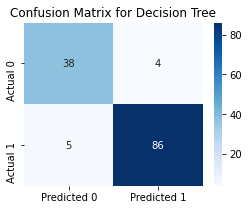



Model Name: Random Forest
Accuracy: 0.9398496240601504
Precision: 0.9560439560439561
Recall: 0.9560439560439561
F1 Score: 0.9560439560439561


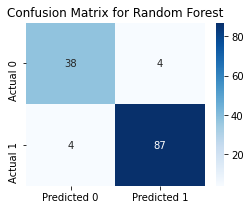



Model Name: Logistic Regression
Accuracy: 0.8721804511278195
Precision: 0.9111111111111111
Recall: 0.9010989010989011
F1 Score: 0.9060773480662984


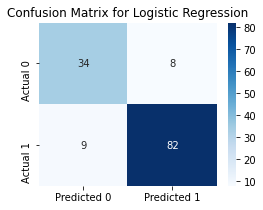



Model Name: Support Vector Machine
Accuracy: 0.8796992481203008
Precision: 0.8947368421052632
Recall: 0.9340659340659341
F1 Score: 0.913978494623656


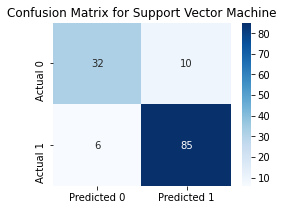



Model Name: K Nearest Neighbors
Accuracy: 0.8721804511278195
Precision: 0.8936170212765957
Recall: 0.9230769230769231
F1 Score: 0.908108108108108


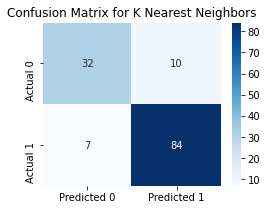

In [53]:
# plot confusion matrix for all models
for model_name, model in models_dict.items():
    plot_confusion_matrix(model_name, model, X_train, y_train, X_test, y_test)

In [54]:
# check results of CV evaluation
results2_df.sort_values(by='F1 Score', ascending=False).round(3)

,Model,Accuracy,Precision,Recall,F1 Score
1,Random Forest,0.940,0.940,0.940,0.940
0,Decision Tree,0.932,0.933,0.932,0.933
3,Support Vector Machine,0.880,0.878,0.880,0.878
2,Logistic Regression,0.872,0.873,0.872,0.873
4,K Nearest Neighbors,0.872,0.871,0.872,0.871




Model Name: Keras DNN
Accuracy: 0.8646616541353384
Precision: 0.8842105263157894
Recall: 0.9230769230769231
F1 Score: 0.9032258064516129


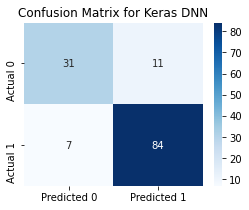

In [55]:
# DNN model
model = create_model(input_shape=(X_train.shape[1],), num_classes=2)

# train model
model.fit(X_train, to_categorical(y_train), epochs=20, batch_size=32, verbose=0)

# get predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# scores
print(f'\n\nModel Name: Keras DNN')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')


# define empty lists to store scores
recall_scores2 = []
precision_scores2 = []
f1_scores2 = []
accuracy_scores2 = []
    
recall_scores2.append(recall_score(y_test, y_pred, average='weighted'))
precision_scores2.append(precision_score(y_test, y_pred, average='weighted'))
f1_scores2.append(f1_score(y_test, y_pred, average='weighted'))
accuracy_scores2.append(accuracy_score(y_test, y_pred))

if 'Keras DNN' not in results2_df['Model'].values:
    results2_df.loc[len(results2_df)] = ['Keras DNN', np.mean(accuracy_scores2), np.mean(precision_scores2), np.mean(recall_scores2), np.mean(f1_scores2)]


# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Keras DNN')
plt.show()


    


In [56]:
# LSTM model
lstm_model = create_lstm_model(input_shape=(X_train.shape[1], 1), num_classes=2)

# Reshape input data for LSTM
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# train model
lstm_model.fit(X_train_reshaped, to_categorical(y_train), epochs=20, batch_size=32, verbose=0)

# get predictions
y_pred = np.argmax(lstm_model.predict(X_test_reshaped), axis=-1)

# scores
print(f'\n\nModel Name: Keras LSTM')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')


# define empty lists to store scores
recall_scores2 = []
precision_scores2 = []
f1_scores2 = []
accuracy_scores2 = []
    
recall_scores2.append(recall_score(y_test, y_pred, average='weighted'))
precision_scores2.append(precision_score(y_test, y_pred, average='weighted'))
f1_scores2.append(f1_score(y_test, y_pred, average='weighted'))
accuracy_scores2.append(accuracy_score(y_test, y_pred))



# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Keras LSTM')
plt.show()

    
if 'Keras LSTM' not in results2_df['Model'].values:
    results2_df.loc[len(results2_df)] = ['Keras LSTM', np.mean(accuracy_scores2), np.mean(precision_scores2), np.mean(recall_scores2), np.mean(f1_scores2)]



AttributeError: 'DataFrame' object has no attribute 'reshape'

In [ ]:
# check results of CV evaluation
results2_df.sort_values(by='F1 Score', ascending=False).round(3)